# Project - Time Series Forecasting 

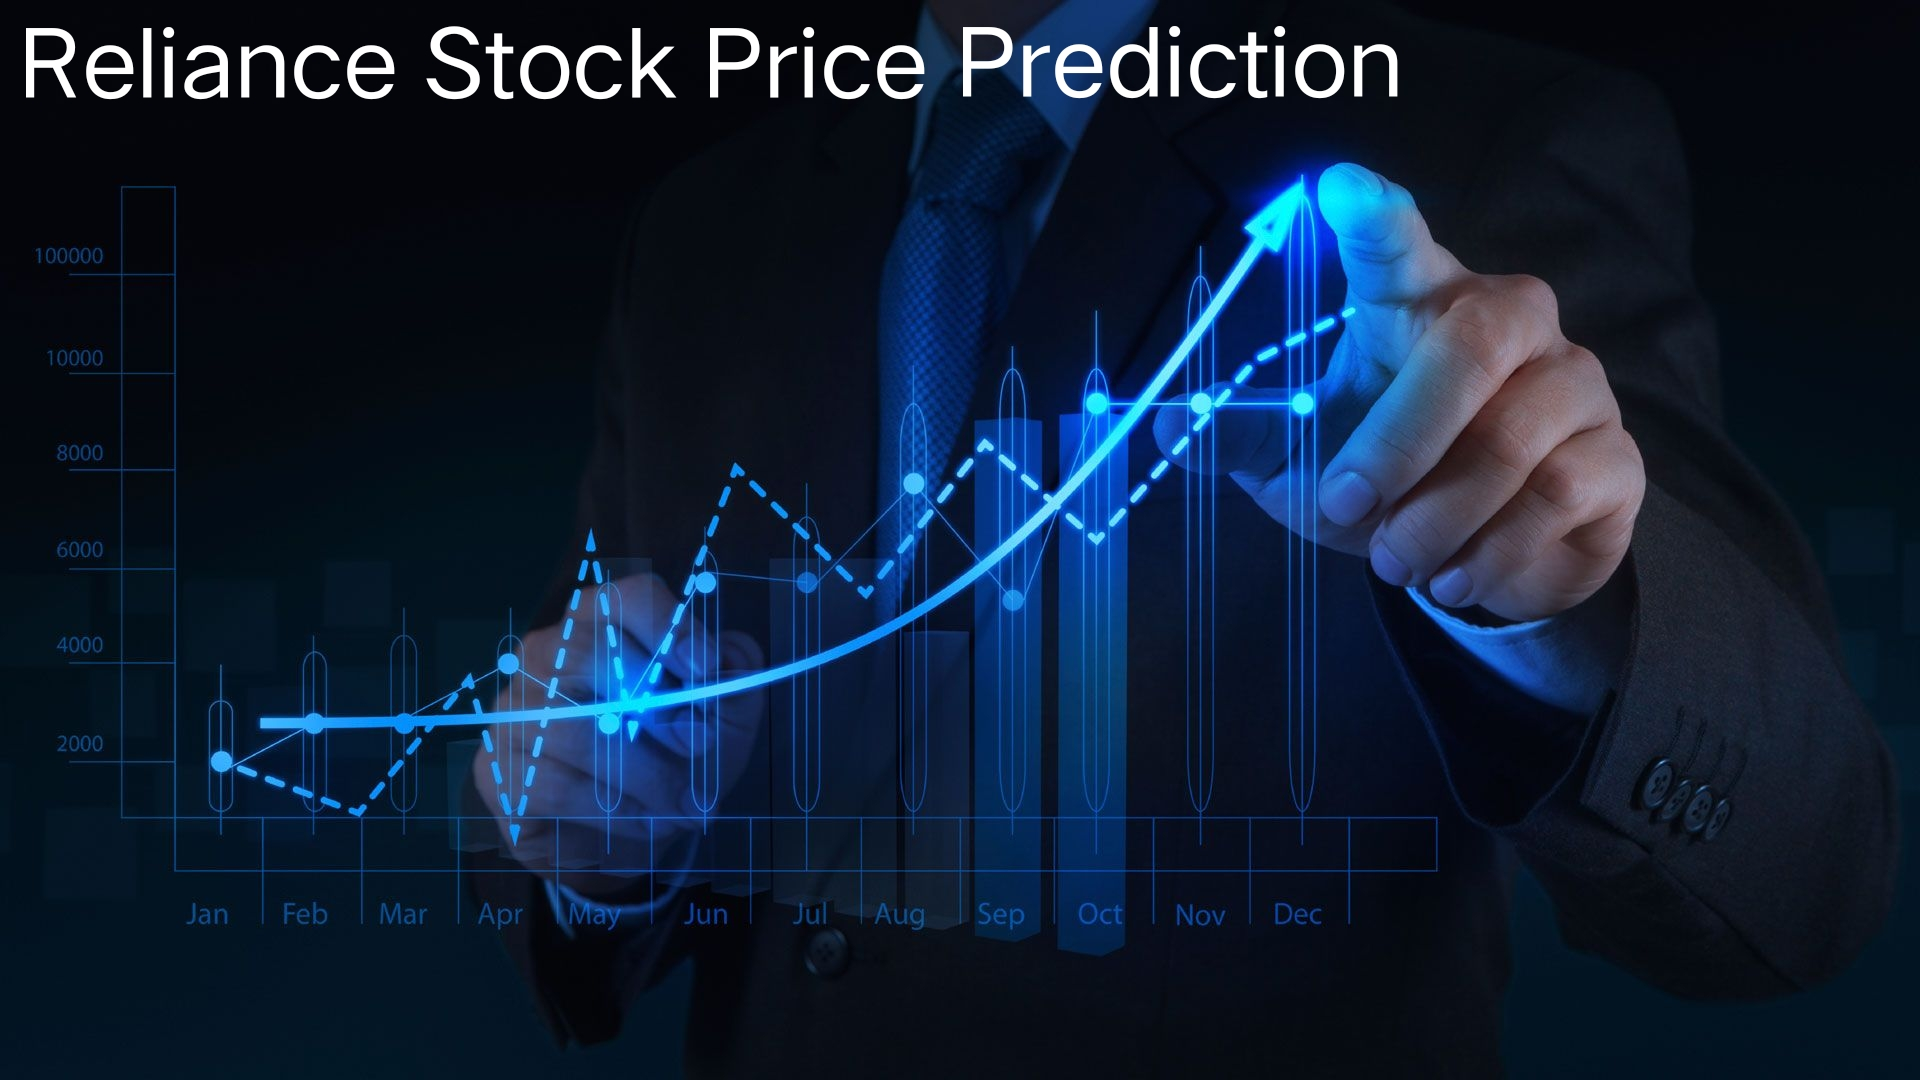

## Business Objective - 
- To Predict the Stock Price Of Reliance for February 2023 using Previous Data(jan,2015-jan,2023) through Forecasting

## Abstract - 
- The stock market has always been a promising avenue for lucrative investing, but most of the profit making depends on the analysis of the current and past scenario followed by subsequent predictive actions.
- The currently overblown market economy has given rise to numerous variables which need to be considered before making a beneficial tranasction in the stock market. manually analysing all these variables and making a business decision is too much cumbersome and error prone.
- In this project we will make use of python to predict the values of stock using machine learning.

## Software
- Python : We are using python programming language which is most commonly used for AI and ML solutions which will be used in our backend server.
- OS : Any operating system with browser support for frontend application 
- Data : So basically we are collecting data from one python library called yfinance.
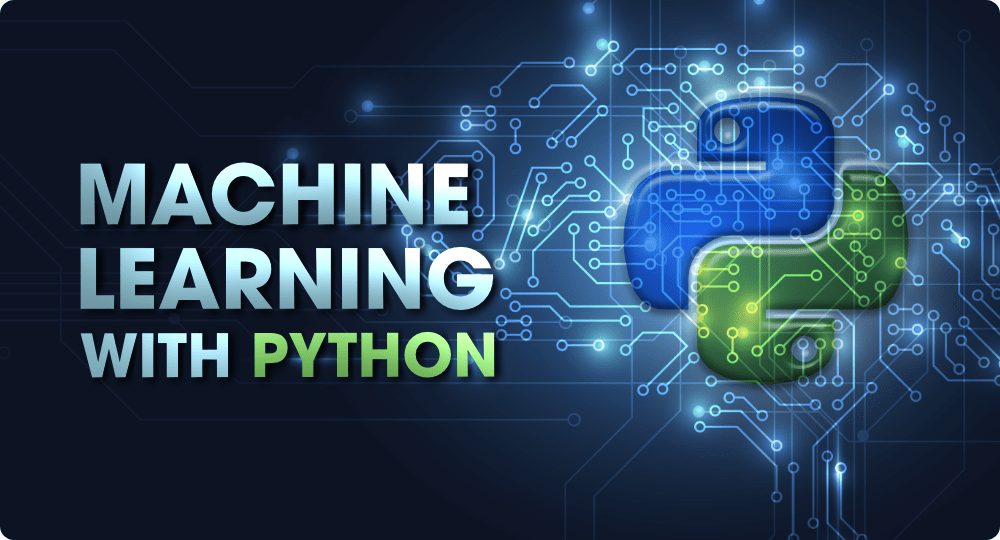

## Libraries Used -
- Numpy
- Pandas
- Matplotlib
- Seaborn
- DateTime 
- Sklearn
- yfinance
- statsmodels

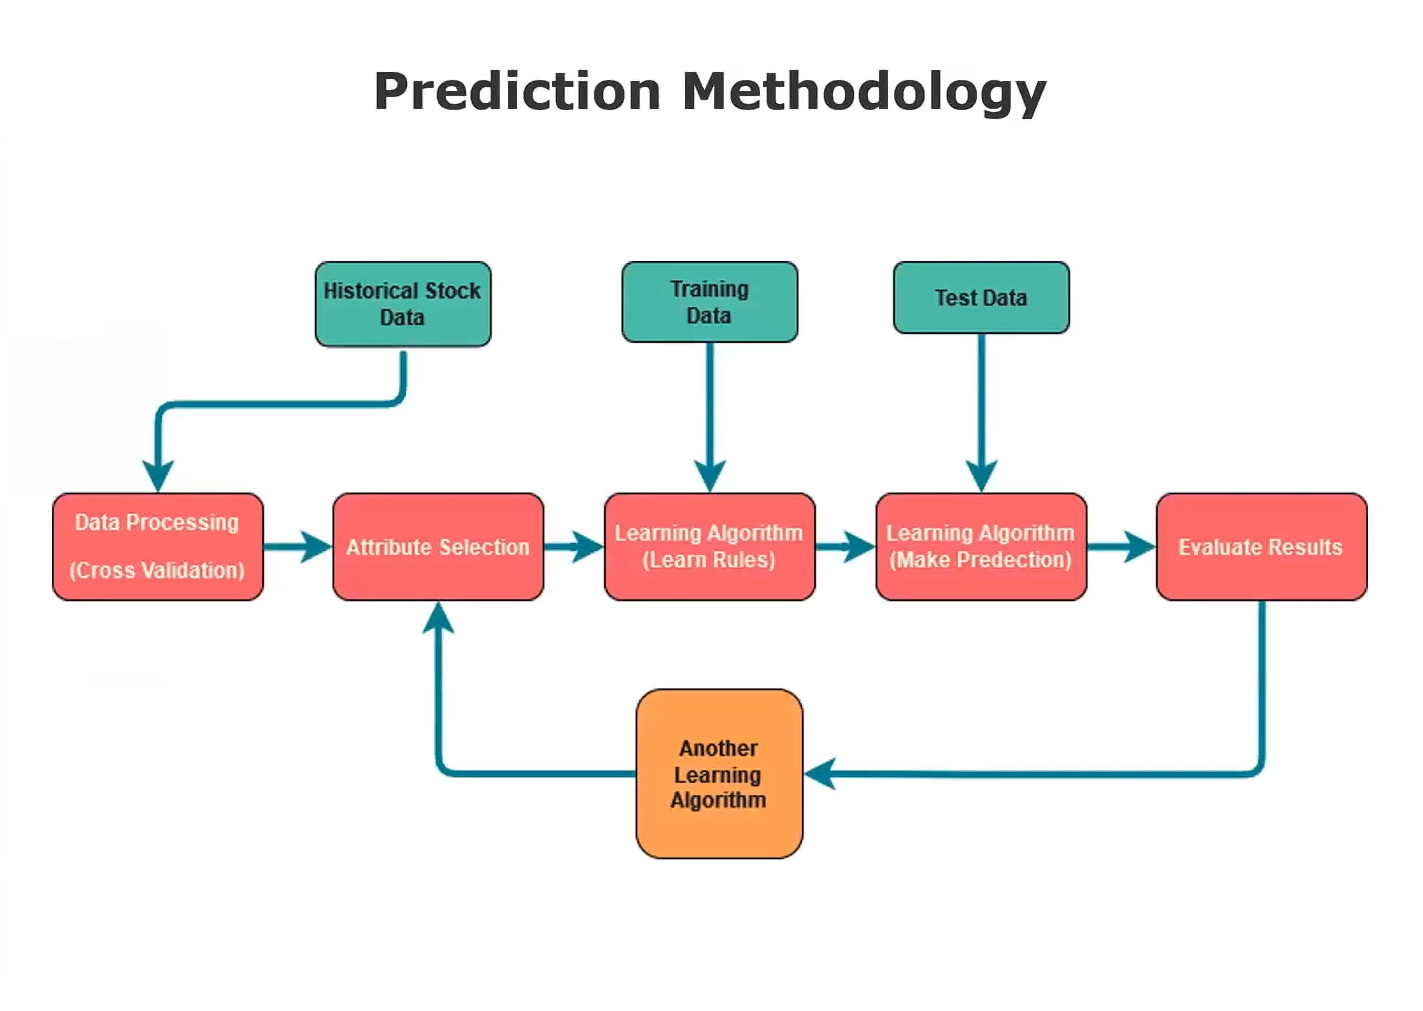

## Methodology
- Historical Stock Data will be collected from python libraries or any web browsers ,that will be raw data.
- The data processing will be done on that data, it will be converted to arrays, tuples, DataFrames according to requirements, EDA should be performed after descriptive analysis.
- From that data we will select particular attributes which we will later use for the learning algorithm.
- Various Rules will set for the Learning algorithm.
- Training data will be given.
- After model has been trained we will give the test data.
- We will evaluate accuracy of all the models and select the model that best fit.
- Depending on test data we will predict the result.

In [1]:
# Installing yfinace library for accessing and analyzing stock data
!pip install yfinance

## Import Libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings 
warnings.filterwarnings('ignore')

## Import Dataset

In [3]:
# Import yfinance Package
import yfinance as yf 

# Set the start and end date
start_date = '2015-01-01'
end_date = '2023-02-01'

# Set the ticker
ticker = 'RELIANCE.NS'

# Get the data
stock_data = yf.download(ticker, start_date, end_date)
stock_data

[*********************100%***********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                          
2015-01-01   438.988831   441.812073   437.676270   439.781311   417.988953   
2015-01-02   439.880371   443.818054   437.998199   438.617340   416.882629   
2015-01-05   438.344940   441.267212   432.946106   433.812897   412.316254   
2015-01-06   430.915344   432.401276   412.093750   414.124512   393.603485   
2015-01-07   414.619812   425.367950   414.570282   423.139069   402.171326   
...                 ...          ...          ...          ...          ...   
2023-01-24  2440.000000  2443.649902  2387.350098  2415.949951  2415.949951   
2023-01-25  2412.449951  2414.699951  2380.000000  2382.550049  2382.550049   
2023-01-27  2384.399902  2387.350098  2311.649902  2337.350098  2337.350098   
2023-01-30  2331.699951  2371.899902  2301.000000  2359.750000  2359.750000   
2023-01-31  2382.000000  2387.649902  2341.000000  2353.850098  2353.850098   

              Volume  
Date                  
2015-01-01   1367720  
2015-01-02   3383424  
2015-01-05   4662967  
2015-01-06   8596809  
2015-01-07   9562421  
...              ...  
2023-01-24   7609558  
2023-01-25   5715684  
2023-01-27  11920991  
2023-01-30  10047822  
2023-01-31  10472167  

[1997 rows x 6 columns]

## Data Description
- We have downloaded the daily stock price data using the yahoo finance api functionality. It's a seven year data from 2015-2022 capturing Open, Close, High, Low, Volume.


- So lets discuss about all the columns present in the dataset.
### Open :- 
- The Price of the stock when the market opens in the morning. 
### Close :-
- The Price of the stock when the market closed in the evening.
### High :-
- Highest Price the stock reached during the day.
### Low :-
- Lowest Price the stock reached during the day.
### Volume :-
- The total amount of stocks traded on that day

## Descriptive Statistics

In [4]:
stock_data.shape #Our dataset has 1997 rows and 6 columns present in it.

(1997, 6)

In [5]:
type(stock_data)

pandas.core.frame.DataFrame

In [6]:
stock_data.head() #Date Started From 01-01-2015

Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-01  438.988831  441.812073  437.676270  439.781311  417.988953   
2015-01-02  439.880371  443.818054  437.998199  438.617340  416.882629   
2015-01-05  438.344940  441.267212  432.946106  433.812897  412.316254   
2015-01-06  430.915344  432.401276  412.093750  414.124512  393.603485   
2015-01-07  414.619812  425.367950  414.570282  423.139069  402.171326   

             Volume  
Date                 
2015-01-01  1367720  
2015-01-02  3383424  
2015-01-05  4662967  
2015-01-06  8596809  
2015-01-07  9562421

In [7]:
stock_data.tail() #End date is 31-01-2023

Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-01-24  2440.000000  2443.649902  2387.350098  2415.949951  2415.949951   
2023-01-25  2412.449951  2414.699951  2380.000000  2382.550049  2382.550049   
2023-01-27  2384.399902  2387.350098  2311.649902  2337.350098  2337.350098   
2023-01-30  2331.699951  2371.899902  2301.000000  2359.750000  2359.750000   
2023-01-31  2382.000000  2387.649902  2341.000000  2353.850098  2353.850098   

              Volume  
Date                  
2023-01-24   7609558  
2023-01-25   5715684  
2023-01-27  11920991  
2023-01-30  10047822  
2023-01-31  10472167

In [8]:
stock_data.columns #6 Columns present in our dataset

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
stock_new = stock_data.reset_index() 
stock_new #In a new variable I reset the index to store the index date as a column to extract month and year from it for analysis

Date         Open         High          Low        Close  \
0    2015-01-01   438.988831   441.812073   437.676270   439.781311   
1    2015-01-02   439.880371   443.818054   437.998199   438.617340   
2    2015-01-05   438.344940   441.267212   432.946106   433.812897   
3    2015-01-06   430.915344   432.401276   412.093750   414.124512   
4    2015-01-07   414.619812   425.367950   414.570282   423.139069   
...         ...          ...          ...          ...          ...   
1992 2023-01-24  2440.000000  2443.649902  2387.350098  2415.949951   
1993 2023-01-25  2412.449951  2414.699951  2380.000000  2382.550049   
1994 2023-01-27  2384.399902  2387.350098  2311.649902  2337.350098   
1995 2023-01-30  2331.699951  2371.899902  2301.000000  2359.750000   
1996 2023-01-31  2382.000000  2387.649902  2341.000000  2353.850098   

        Adj Close    Volume  
0      417.988953   1367720  
1      416.882629   3383424  
2      412.316254   4662967  
3      393.603485   8596809  
4      402.171326   9562421  
...           ...       ...  
1992  2415.949951   7609558  
1993  2382.550049   5715684  
1994  2337.350098  11920991  
1995  2359.750000  10047822  
1996  2353.850098  10472167  

[1997 rows x 7 columns]

In [10]:
stock_data.isnull().sum() # We can see no null values present in our dataset

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
stock_data[stock_data.duplicated()] # No duplicate values present in our dataset

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []

In [12]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1997 entries, 2015-01-01 to 2023-01-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1997 non-null   float64
 1   High       1997 non-null   float64
 2   Low        1997 non-null   float64
 3   Close      1997 non-null   float64
 4   Adj Close  1997 non-null   float64
 5   Volume     1997 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 109.2 KB


In [13]:
stock_data.describe().T

count          mean           std            min           25%  \
Open       1997.0  1.328085e+03  7.576990e+02     404.466064  5.324529e+02   
High       1997.0  1.343065e+03  7.658298e+02     405.010895  5.394119e+02   
Low        1997.0  1.312309e+03  7.487928e+02     394.485657  5.282428e+02   
Close      1997.0  1.327059e+03  7.569370e+02     401.568542  5.330720e+02   
Adj Close  1997.0  1.312770e+03  7.612791e+02     381.669708  5.175280e+02   
Volume     1997.0  9.059262e+06  6.669217e+06  787160.000000  5.238304e+06   

                    50%           75%           max  
Open       1.186305e+03  2.072900e+03  2.856150e+03  
High       1.203987e+03  2.091000e+03  2.856150e+03  
Low        1.171594e+03  2.036000e+03  2.786100e+03  
Close      1.186206e+03  2.062400e+03  2.819850e+03  
Adj Close  1.171243e+03  2.049616e+03  2.811386e+03  
Volume     7.126831e+06  1.022405e+07  6.584835e+07

In [14]:
stock_data.corr()

Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999743  0.999742  0.999465   0.999459  0.064336
High       0.999743  1.000000  0.999684  0.999801   0.999789  0.073422
Low        0.999742  0.999684  1.000000  0.999776   0.999771  0.057783
Close      0.999465  0.999801  0.999776  1.000000   0.999990  0.066420
Adj Close  0.999459  0.999789  0.999771  0.999990   1.000000  0.065705
Volume     0.064336  0.073422  0.057783  0.066420   0.065705  1.000000

### Insights -
- We can see all the columns are highly correlated with each other expect the volume column.

## Adding Month Column and Year Column to our Dataset

In [15]:
stock_new["date"] = pd.to_datetime(stock_new.Date,format = "%d-%b-%y")

# Extracting Weekday name, Month name, Year from the date column using Date function in Pandas

stock_new["day"] = stock_new.Date.dt.strftime("%d") # Date Extraction
stock_new["month"] = stock_new.Date.dt.strftime("%b") # Month Extraction
stock_new["year"] = stock_new.Date.dt.strftime("%Y") # Year Extraction
stock_new["weekday"] = stock_new.Date.dt.strftime("%A") # Weekday Extraction

## Change column names

In [16]:
df = pd.DataFrame(stock_new)
dict = {"Date" : "date", "Open" : "open", "High" : "high", "Low" : "low", "Close" : "close", "Adj Close" : "adj_close", "Volume" : "volume"}
df.rename(columns = dict, inplace = True)

In [17]:
df1 = pd.DataFrame(stock_data)
dict = {"Open" : "open", "High" : "high", "Low" : "low", "Close" : "close", "Adj Close" : "adj_close", "Volume" : "volume"}
df1.rename(columns = dict, inplace = True)

In [18]:
df.head()

date        open        high         low       close   adj_close  \
0 2015-01-01  438.988831  441.812073  437.676270  439.781311  417.988953   
1 2015-01-02  439.880371  443.818054  437.998199  438.617340  416.882629   
2 2015-01-05  438.344940  441.267212  432.946106  433.812897  412.316254   
3 2015-01-06  430.915344  432.401276  412.093750  414.124512  393.603485   
4 2015-01-07  414.619812  425.367950  414.570282  423.139069  402.171326   

    volume       date day month  year    weekday  
0  1367720 2015-01-01  01   Jan  2015   Thursday  
1  3383424 2015-01-02  02   Jan  2015     Friday  
2  4662967 2015-01-05  05   Jan  2015     Monday  
3  8596809 2015-01-06  06   Jan  2015    Tuesday  
4  9562421 2015-01-07  07   Jan  2015  Wednesday

In [19]:
stock_final = df
stock_final

date         open         high          low        close  \
0    2015-01-01   438.988831   441.812073   437.676270   439.781311   
1    2015-01-02   439.880371   443.818054   437.998199   438.617340   
2    2015-01-05   438.344940   441.267212   432.946106   433.812897   
3    2015-01-06   430.915344   432.401276   412.093750   414.124512   
4    2015-01-07   414.619812   425.367950   414.570282   423.139069   
...         ...          ...          ...          ...          ...   
1992 2023-01-24  2440.000000  2443.649902  2387.350098  2415.949951   
1993 2023-01-25  2412.449951  2414.699951  2380.000000  2382.550049   
1994 2023-01-27  2384.399902  2387.350098  2311.649902  2337.350098   
1995 2023-01-30  2331.699951  2371.899902  2301.000000  2359.750000   
1996 2023-01-31  2382.000000  2387.649902  2341.000000  2353.850098   

        adj_close    volume       date day month  year    weekday  
0      417.988953   1367720 2015-01-01  01   Jan  2015   Thursday  
1      416.882629   3383424 2015-01-02  02   Jan  2015     Friday  
2      412.316254   4662967 2015-01-05  05   Jan  2015     Monday  
3      393.603485   8596809 2015-01-06  06   Jan  2015    Tuesday  
4      402.171326   9562421 2015-01-07  07   Jan  2015  Wednesday  
...           ...       ...        ...  ..   ...   ...        ...  
1992  2415.949951   7609558 2023-01-24  24   Jan  2023    Tuesday  
1993  2382.550049   5715684 2023-01-25  25   Jan  2023  Wednesday  
1994  2337.350098  11920991 2023-01-27  27   Jan  2023     Friday  
1995  2359.750000  10047822 2023-01-30  30   Jan  2023     Monday  
1996  2353.850098  10472167 2023-01-31  31   Jan  2023    Tuesday  

[1997 rows x 12 columns]

In [20]:
days = stock_final.weekday.value_counts()
days

Thursday     402
Wednesday    402
Tuesday      400
Monday       399
Friday       392
Sunday         1
Saturday       1
Name: weekday, dtype: int64

### Insights -
- We can see that in weekday column there are only two unique values are there Sunday and Saturday on which only one one pridction done for stock, it may be outlier for us. But we will consider it as of now.

## Splitting Data into Train and Test

#### We are using 2015-2022 data set for Training and jan,2023 dataset for Testing here

In [21]:
test_data = stock_data.tail(21)
test_data

open         high          low        close    adj_close  \
Date                                                                          
2023-01-02  2550.000000  2579.000000  2548.199951  2575.899902  2575.899902   
2023-01-03  2565.050049  2573.000000  2547.800049  2557.050049  2557.050049   
2023-01-04  2557.000000  2561.050049  2514.000000  2518.550049  2518.550049   
2023-01-05  2523.500000  2536.399902  2504.000000  2514.050049  2514.050049   
2023-01-06  2526.649902  2547.949951  2518.300049  2536.899902  2536.899902   
2023-01-09  2545.300049  2602.000000  2543.350098  2596.800049  2596.800049   
2023-01-10  2606.000000  2606.000000  2546.000000  2558.399902  2558.399902   
2023-01-11  2552.500000  2558.000000  2521.100098  2526.149902  2526.149902   
2023-01-12  2524.850098  2532.500000  2465.000000  2471.600098  2471.600098   
2023-01-13  2458.399902  2472.899902  2434.600098  2467.600098  2467.600098   
2023-01-16  2472.699951  2479.649902  2427.000000  2444.100098  2444.100098   
2023-01-17  2458.000000  2483.000000  2450.600098  2478.800049  2478.800049   
2023-01-18  2473.500000  2491.100098  2460.350098  2474.699951  2474.699951   
2023-01-19  2472.899902  2481.149902  2456.649902  2472.050049  2472.050049   
2023-01-20  2475.000000  2475.000000  2437.250000  2442.649902  2442.649902   
2023-01-23  2449.000000  2466.199951  2425.000000  2430.300049  2430.300049   
2023-01-24  2440.000000  2443.649902  2387.350098  2415.949951  2415.949951   
2023-01-25  2412.449951  2414.699951  2380.000000  2382.550049  2382.550049   
2023-01-27  2384.399902  2387.350098  2311.649902  2337.350098  2337.350098   
2023-01-30  2331.699951  2371.899902  2301.000000  2359.750000  2359.750000   
2023-01-31  2382.000000  2387.649902  2341.000000  2353.850098  2353.850098   

              volume  
Date                  
2023-01-02   2453414  
2023-01-03   3534596  
2023-01-04   4275746  
2023-01-05   6293519  
2023-01-06   2930338  
2023-01-09   4948549  
2023-01-10   3713755  
2023-01-11   5311657  
2023-01-12   8163366  
2023-01-13   9515473  
2023-01-16   6287407  
2023-01-17   4961585  
2023-01-18   6206382  
2023-01-19   5510333  
2023-01-20   6890325  
2023-01-23   5055324  
2023-01-24   7609558  
2023-01-25   5715684  
2023-01-27  11920991  
2023-01-30  10047822  
2023-01-31  10472167

In [22]:
train_data = stock_data[0:-21]
train_data

open         high          low        close    adj_close  \
Date                                                                          
2015-01-01   438.988831   441.812073   437.676270   439.781311   417.988953   
2015-01-02   439.880371   443.818054   437.998199   438.617340   416.882629   
2015-01-05   438.344940   441.267212   432.946106   433.812897   412.316254   
2015-01-06   430.915344   432.401276   412.093750   414.124512   393.603485   
2015-01-07   414.619812   425.367950   414.570282   423.139069   402.171326   
...                 ...          ...          ...          ...          ...   
2022-12-26  2514.750000  2542.000000  2492.399902  2524.050049  2524.050049   
2022-12-27  2530.000000  2548.800049  2515.250000  2544.699951  2544.699951   
2022-12-28  2538.000000  2549.800049  2521.500000  2544.449951  2544.449951   
2022-12-29  2527.000000  2548.899902  2525.500000  2543.300049  2543.300049   
2022-12-30  2545.100098  2577.000000  2541.100098  2547.199951  2547.199951   

             volume  
Date                 
2015-01-01  1367720  
2015-01-02  3383424  
2015-01-05  4662967  
2015-01-06  8596809  
2015-01-07  9562421  
...             ...  
2022-12-26  2764496  
2022-12-27  2659749  
2022-12-28  3442509  
2022-12-29  3198493  
2022-12-30  3364092  

[1976 rows x 6 columns]

In [23]:
train_data.dtypes

open         float64
high         float64
low          float64
close        float64
adj_close    float64
volume         int64
dtype: object

## Exploratory Data Analysis

## Heatmap

<AxesSubplot:xlabel='month', ylabel='year'>

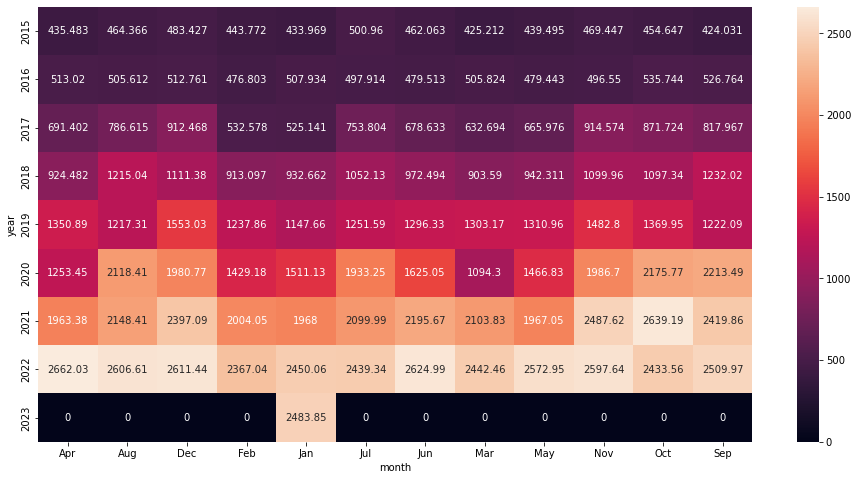

In [24]:
plt.figure(figsize=(16,8))
heatmap_open = pd.pivot_table(data = stock_final, values = "open", index = "year", columns = "month", aggfunc = "mean", fill_value = 0)
sns.heatmap(heatmap_open, annot = True, fmt = "g") # fmt is format of the grid values

### Insights :
- We can see that the open values are high for September and Decmber in all year by seeing the peachy line.
- The maximum value for open is oct-2021, (apr,aug & jun)-2022.
- Highest Value is 2639.19 (Oct-2021)
- With increasing in year the open price of stocks are also increasing.

<AxesSubplot:xlabel='month', ylabel='year'>

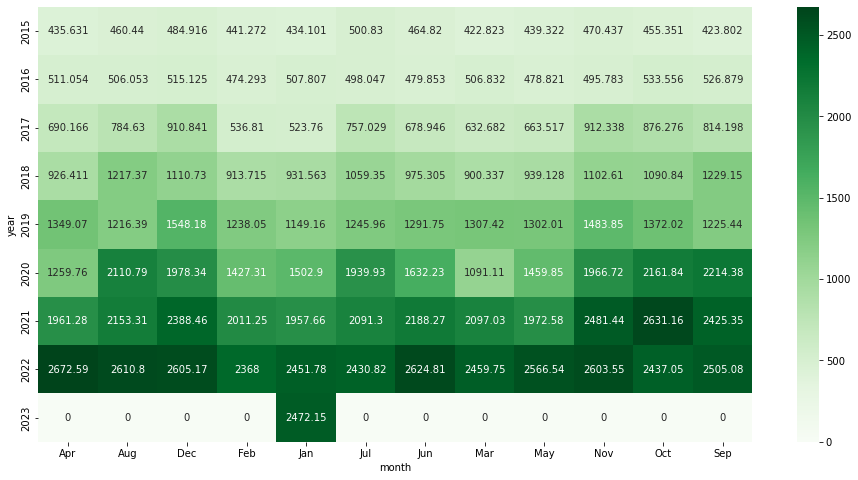

In [25]:
plt.figure(figsize=(16,8))
heatmap_open = pd.pivot_table(data = stock_final, values = "close", index = "year", columns = "month", aggfunc = "mean", fill_value = 0)
sns.heatmap(heatmap_open, annot = True, fmt = "g", cmap = "Greens") # fmt is format of the grid values

### Insights
- We can see that the open values are high for November and Decmber in all year by seeing the darkcolour line.
- The maximum value for close is oct-2021, (apr,aug,jun,nov & dec)-2022.
- Highest value is 2672.59 (Apr - 2022)
- With increasing in year the close price are also increasing.

<AxesSubplot:xlabel='month', ylabel='year'>

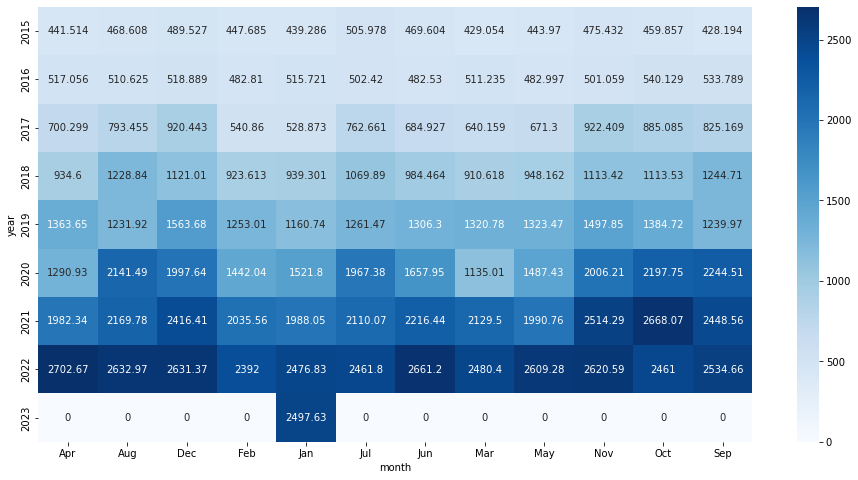

In [26]:
plt.figure(figsize=(16,8))
heatmap_open = pd.pivot_table(data = stock_final, values = "high", index = "year", columns = "month", aggfunc = "mean", fill_value = 0)
sns.heatmap(heatmap_open, annot = True, fmt = "g", cmap = "Blues") # fmt is format of the grid values

### Insights :
- We can see that the stock price are high for September,November and Decmber in all year by seeing the Darkcolour line.
- The maximum value for stocks are in oct-2021, (apr,jun,aug)-2022.
- High value is 2702.67 (Apr-2022)
- With increasing in year the high price of stocks are also increasing.

<AxesSubplot:xlabel='month', ylabel='year'>

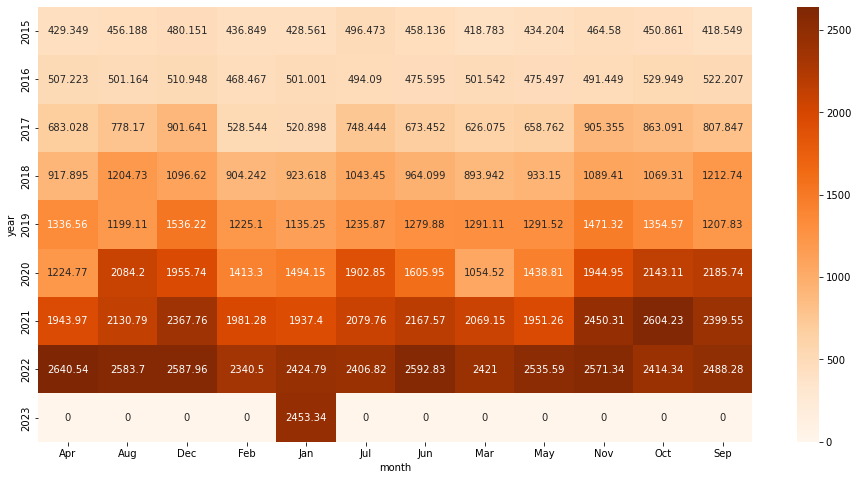

In [27]:
plt.figure(figsize=(16,8))
heatmap_open = pd.pivot_table(data = stock_final, values = "low", index = "year", columns = "month", aggfunc = "mean", fill_value = 0)
sns.heatmap(heatmap_open, annot = True, fmt = "g", cmap = "Oranges") # fmt is format of the grid values

### Insights :
- We can see that the stock price are low for February,March and May in all year by seeing the Peachycolour line.
- The minimum value for stocks are in mar-2020, jan-2021, feb-2022.
- High value is 2702.67 (Apr-2022)
- With increasing in year the low price of stocks are also increasing.

## Bar Chart

### For Open Column (Year Wise)

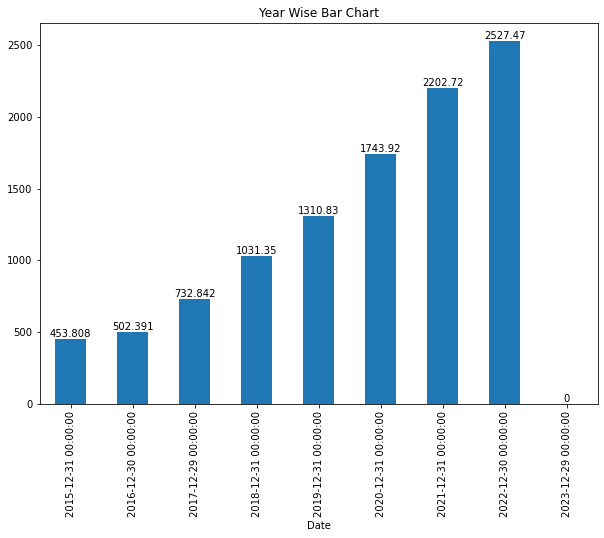

In [28]:
ax = train_data['open'].resample(rule = 'BA').mean().plot(kind = 'bar', figsize=(10,7))
plt.title("Year Wise Bar Chart")
for i in ax.containers:
    ax.bar_label(i,)

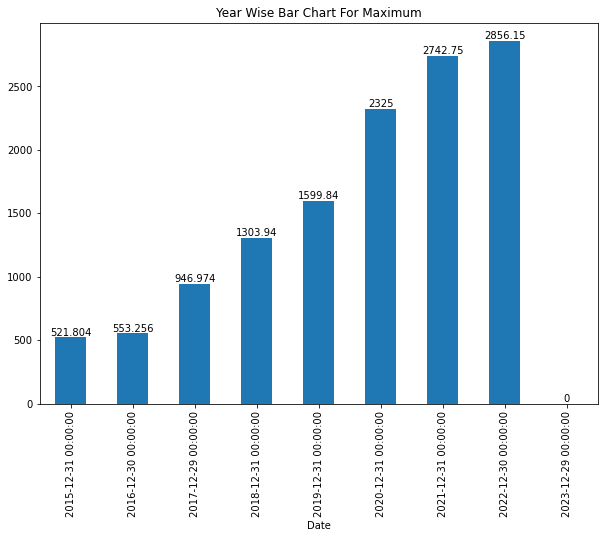

In [29]:
ay = train_data['open'].resample(rule = 'BA').max().plot(kind = 'bar' ,figsize = (10,7))
plt.title("Year Wise Bar Chart For Maximum")
for i in ay.containers:
    ay.bar_label(i,)

[Text(0, 0, '404.466'),
 Text(0, 0, '454.69'),
 Text(0, 0, '503.725'),
 Text(0, 0, '868.765'),
 Text(0, 0, '1084.72'),
 Text(0, 0, '907.597'),
 Text(0, 0, '1859.4'),
 Text(0, 0, '2211.5'),
 Text(0, 0, '0')]

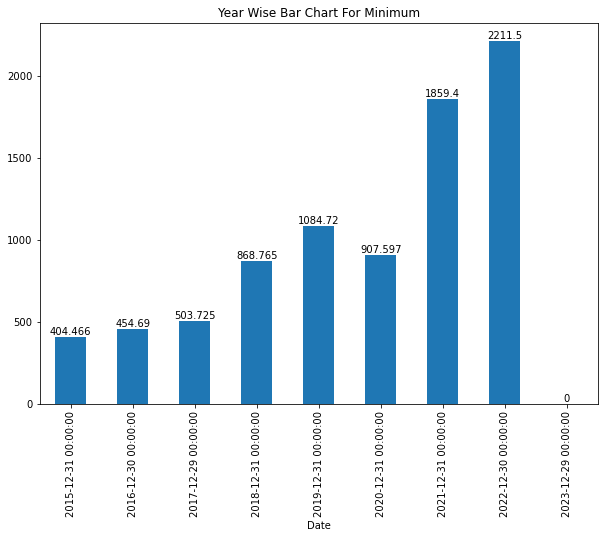

In [30]:
az = train_data['open'].resample(rule = 'BA').min().plot(kind = 'bar' ,figsize = (10,7))
plt.title("Year Wise Bar Chart For Minimum")
az.bar_label(az.containers[0])

###  For Open Column (Month Wise)

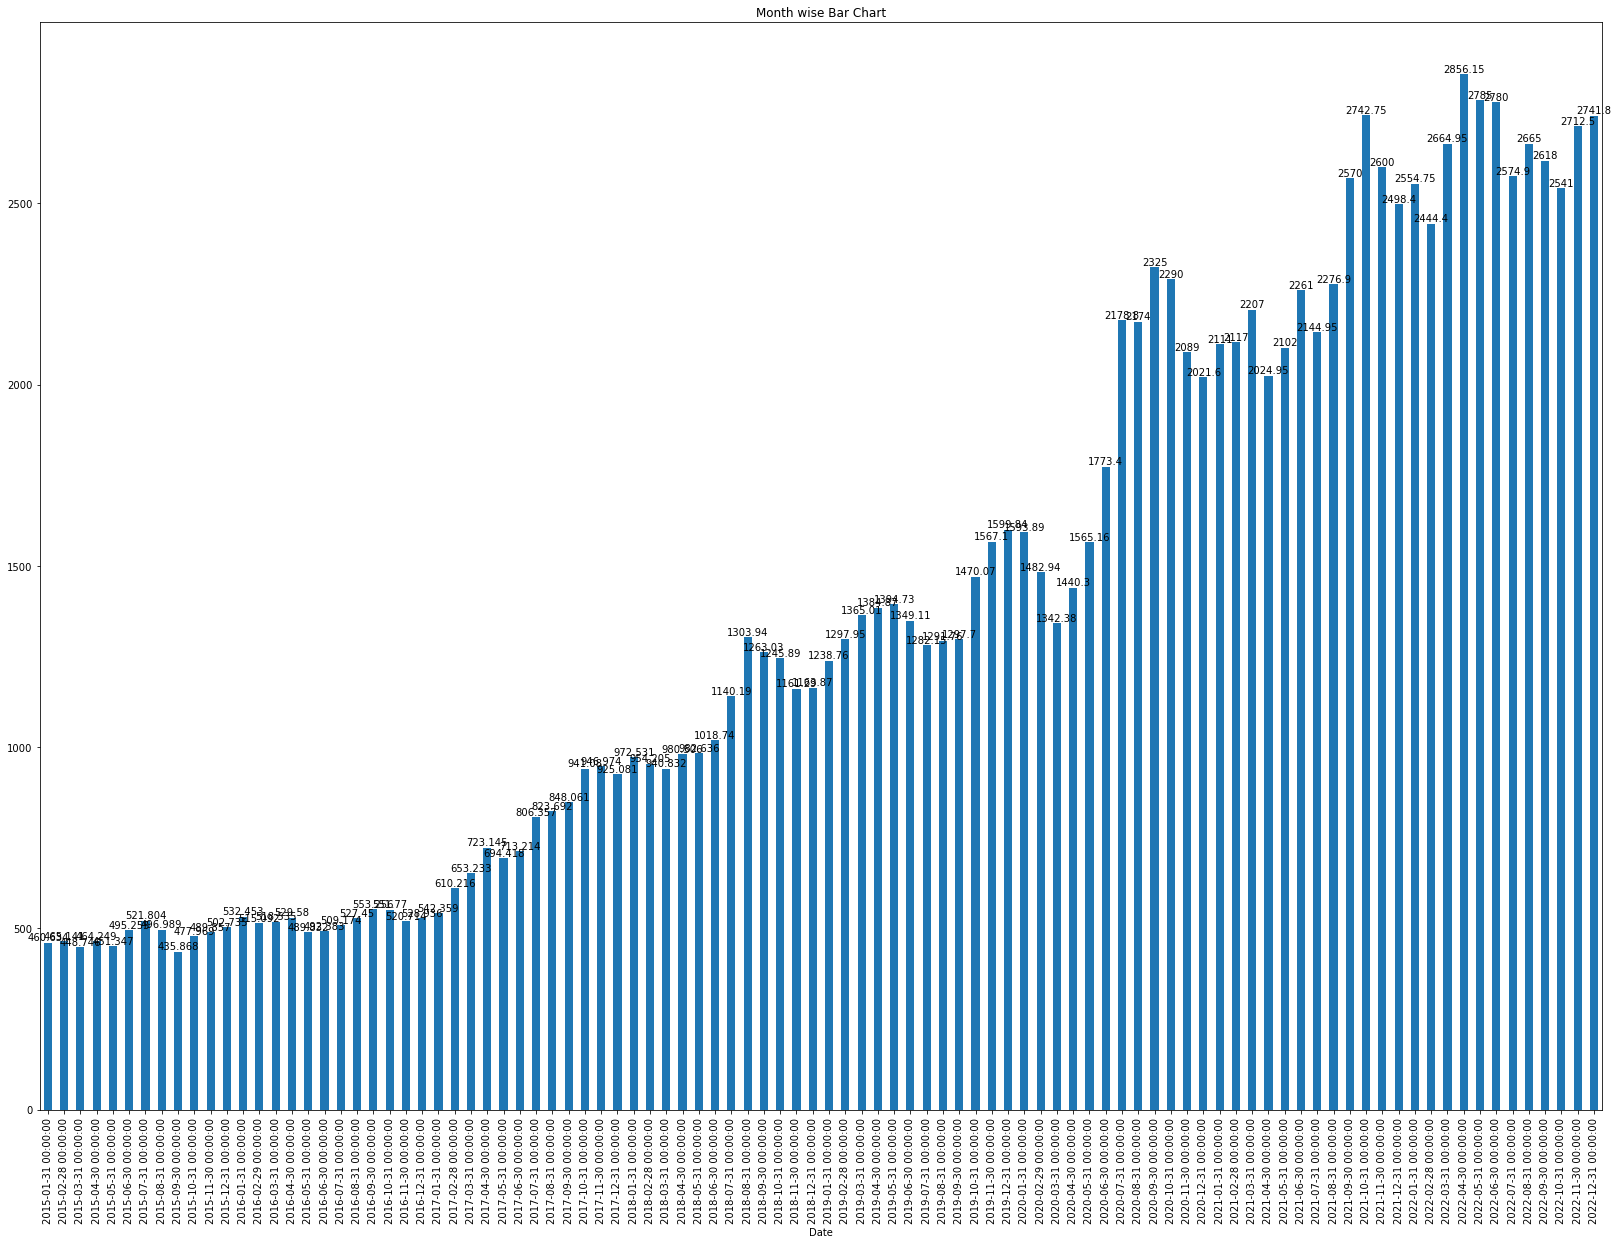

In [31]:
ap = train_data['open'].resample(rule = 'M').max().plot(kind = 'bar', figsize=(28,20))
plt.title("Month wise Bar Chart")
for i in ap.containers:
    ap.bar_label(i,)

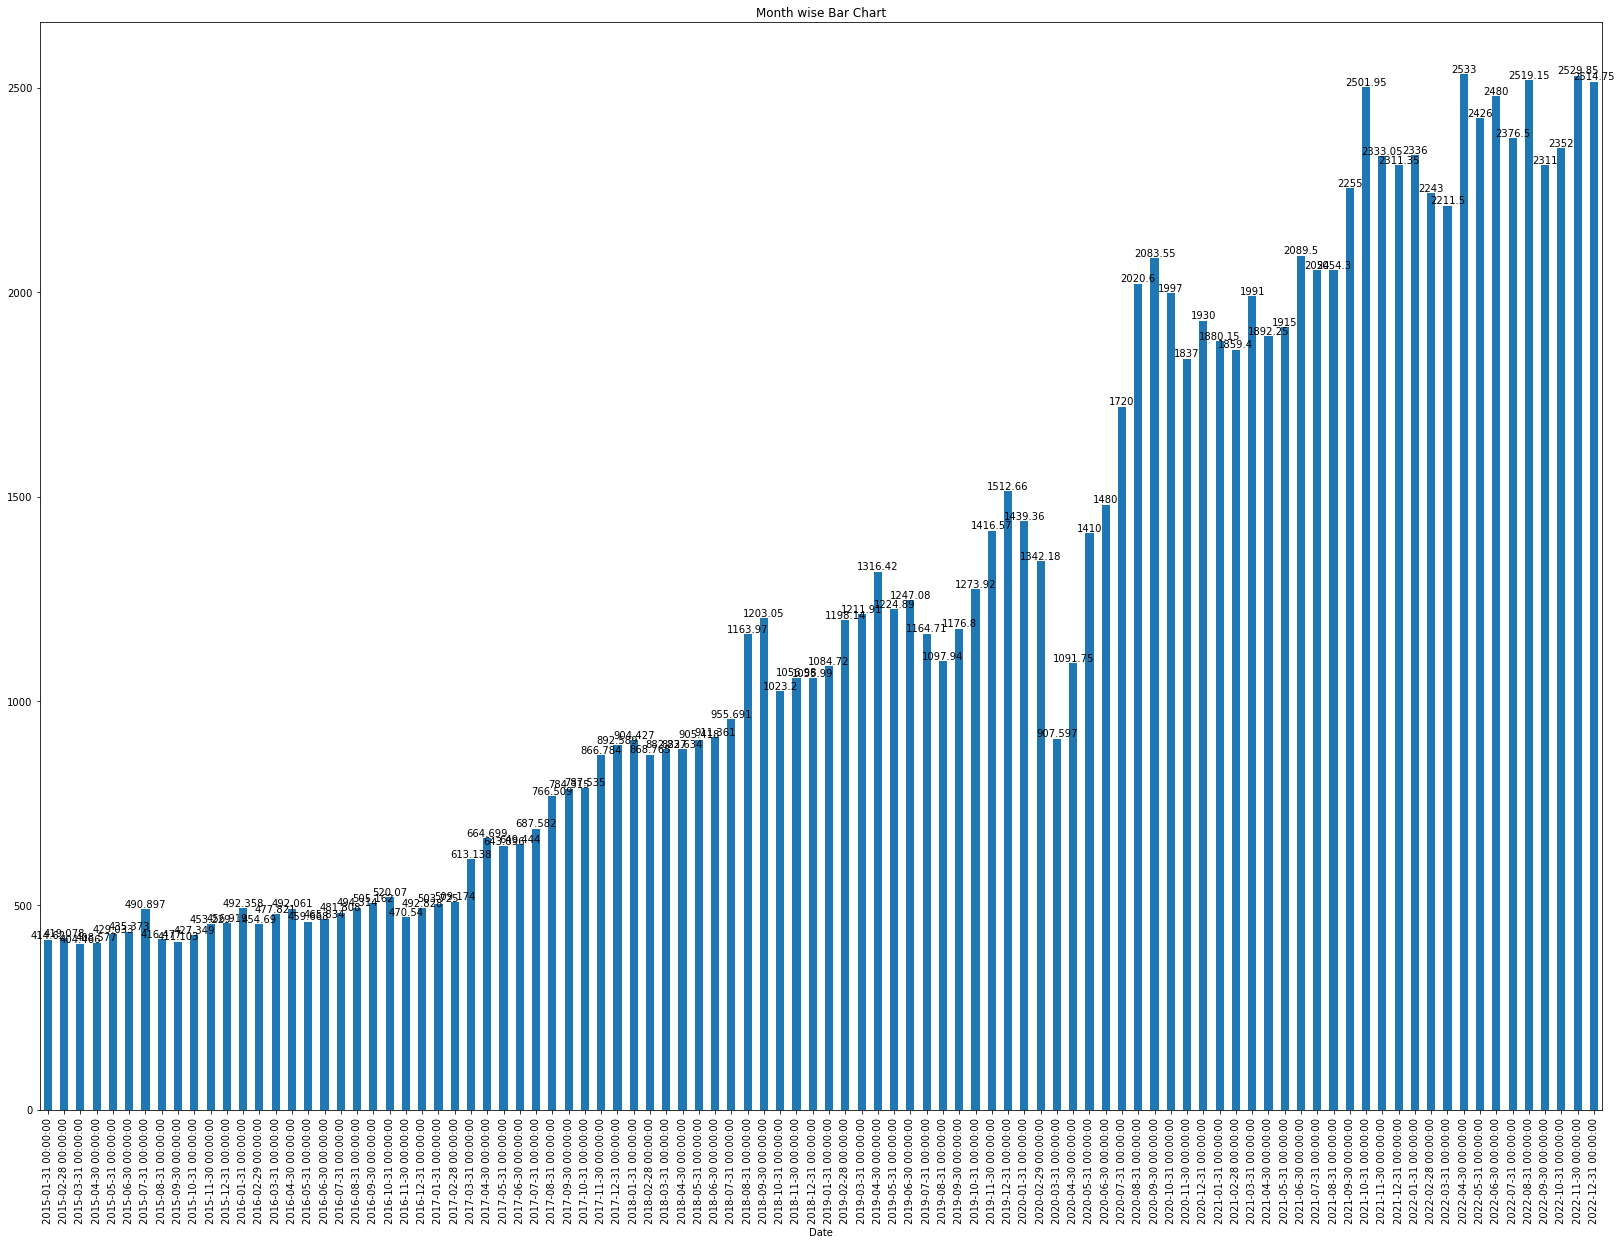

In [32]:
aq = train_data['open'].resample(rule = 'M').min().plot(kind = 'bar', figsize=(28,20))
plt.title("Month wise Bar Chart")
for i in aq.containers:
    aq.bar_label(i,)

### For Close Column (Year Wise)

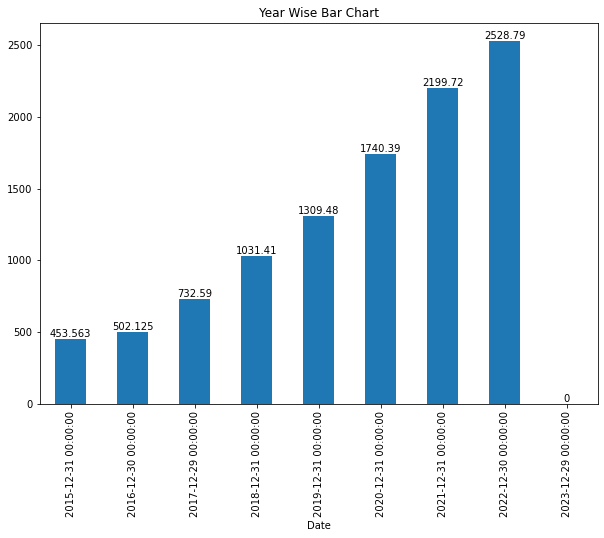

In [33]:
bx = train_data['close'].resample(rule = 'BA').mean().plot(kind = 'bar', figsize=(10,7))
plt.title("Year Wise Bar Chart")
for i in bx.containers:
    bx.bar_label(i,)

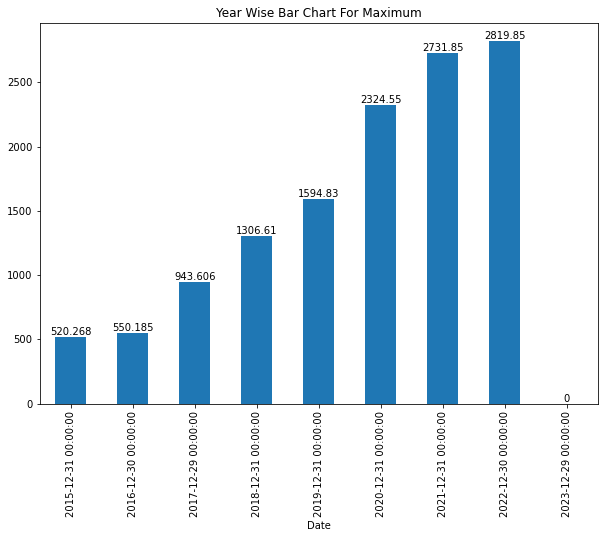

In [34]:
by = train_data['close'].resample(rule = 'BA').max().plot(kind = 'bar' ,figsize = (10,7))
plt.title("Year Wise Bar Chart For Maximum")
for i in by.containers:
    by.bar_label(i,)

[Text(0, 0, '401.569'),
 Text(0, 0, '449.019'),
 Text(0, 0, '503.18'),
 Text(0, 0, '874.411'),
 Text(0, 0, '1082.49'),
 Text(0, 0, '875.749'),
 Text(0, 0, '1841.95'),
 Text(0, 0, '2235.5'),
 Text(0, 0, '0')]

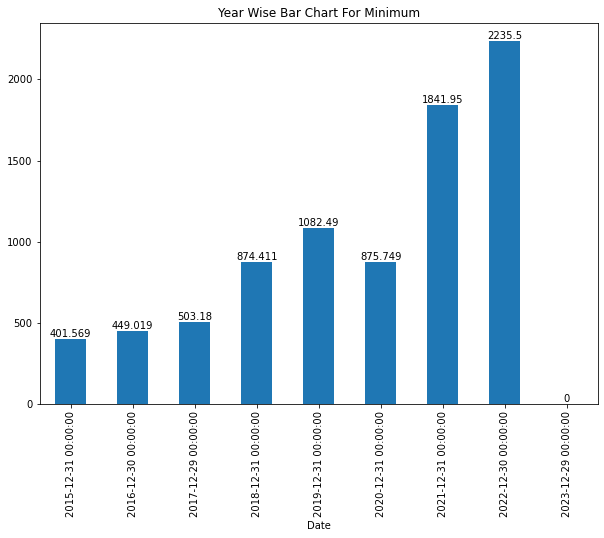

In [35]:
bz = train_data['close'].resample(rule = 'BA').min().plot(kind = 'bar' ,figsize = (10,7))
plt.title("Year Wise Bar Chart For Minimum")
bz.bar_label(bz.containers[0])

### For Close Column (Month Wise)

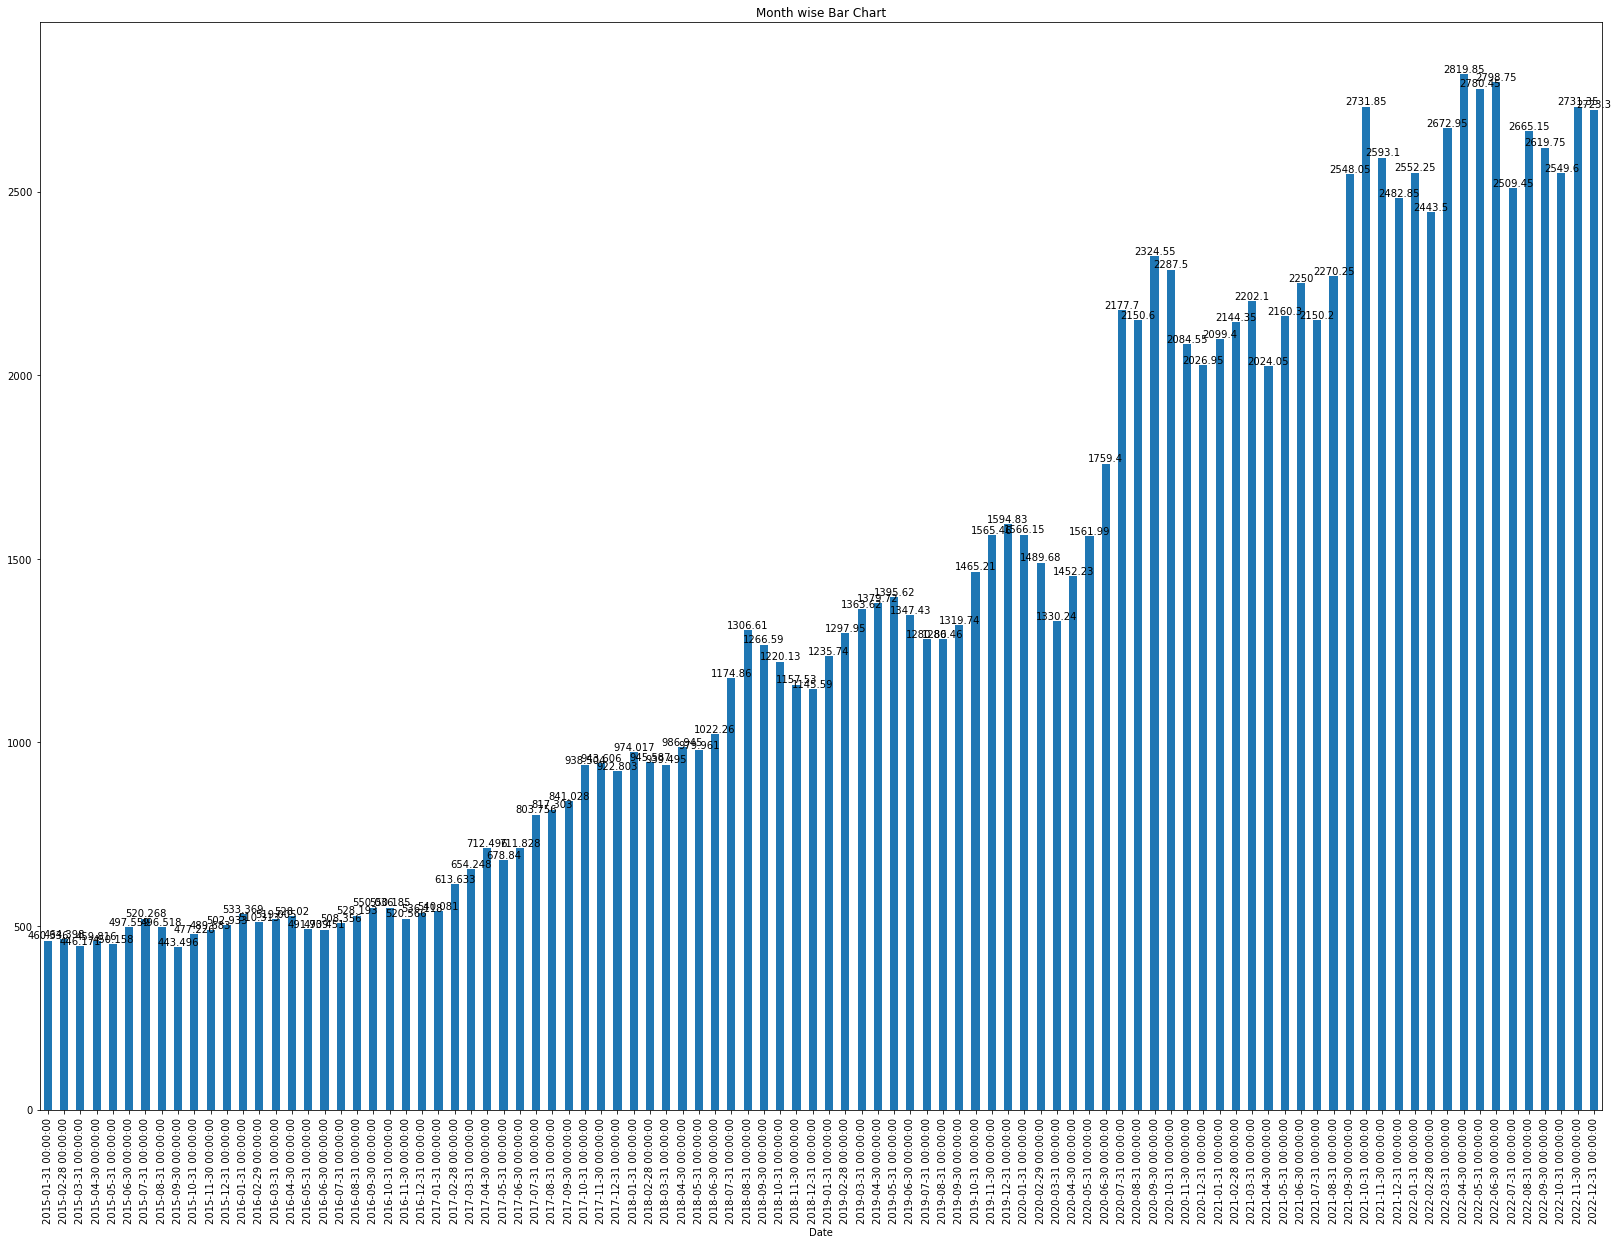

In [36]:
bp = train_data['close'].resample(rule = 'M').max().plot(kind = 'bar', figsize=(28,20))
plt.title("Month wise Bar Chart")
for i in bp.containers:
    bp.bar_label(i,)

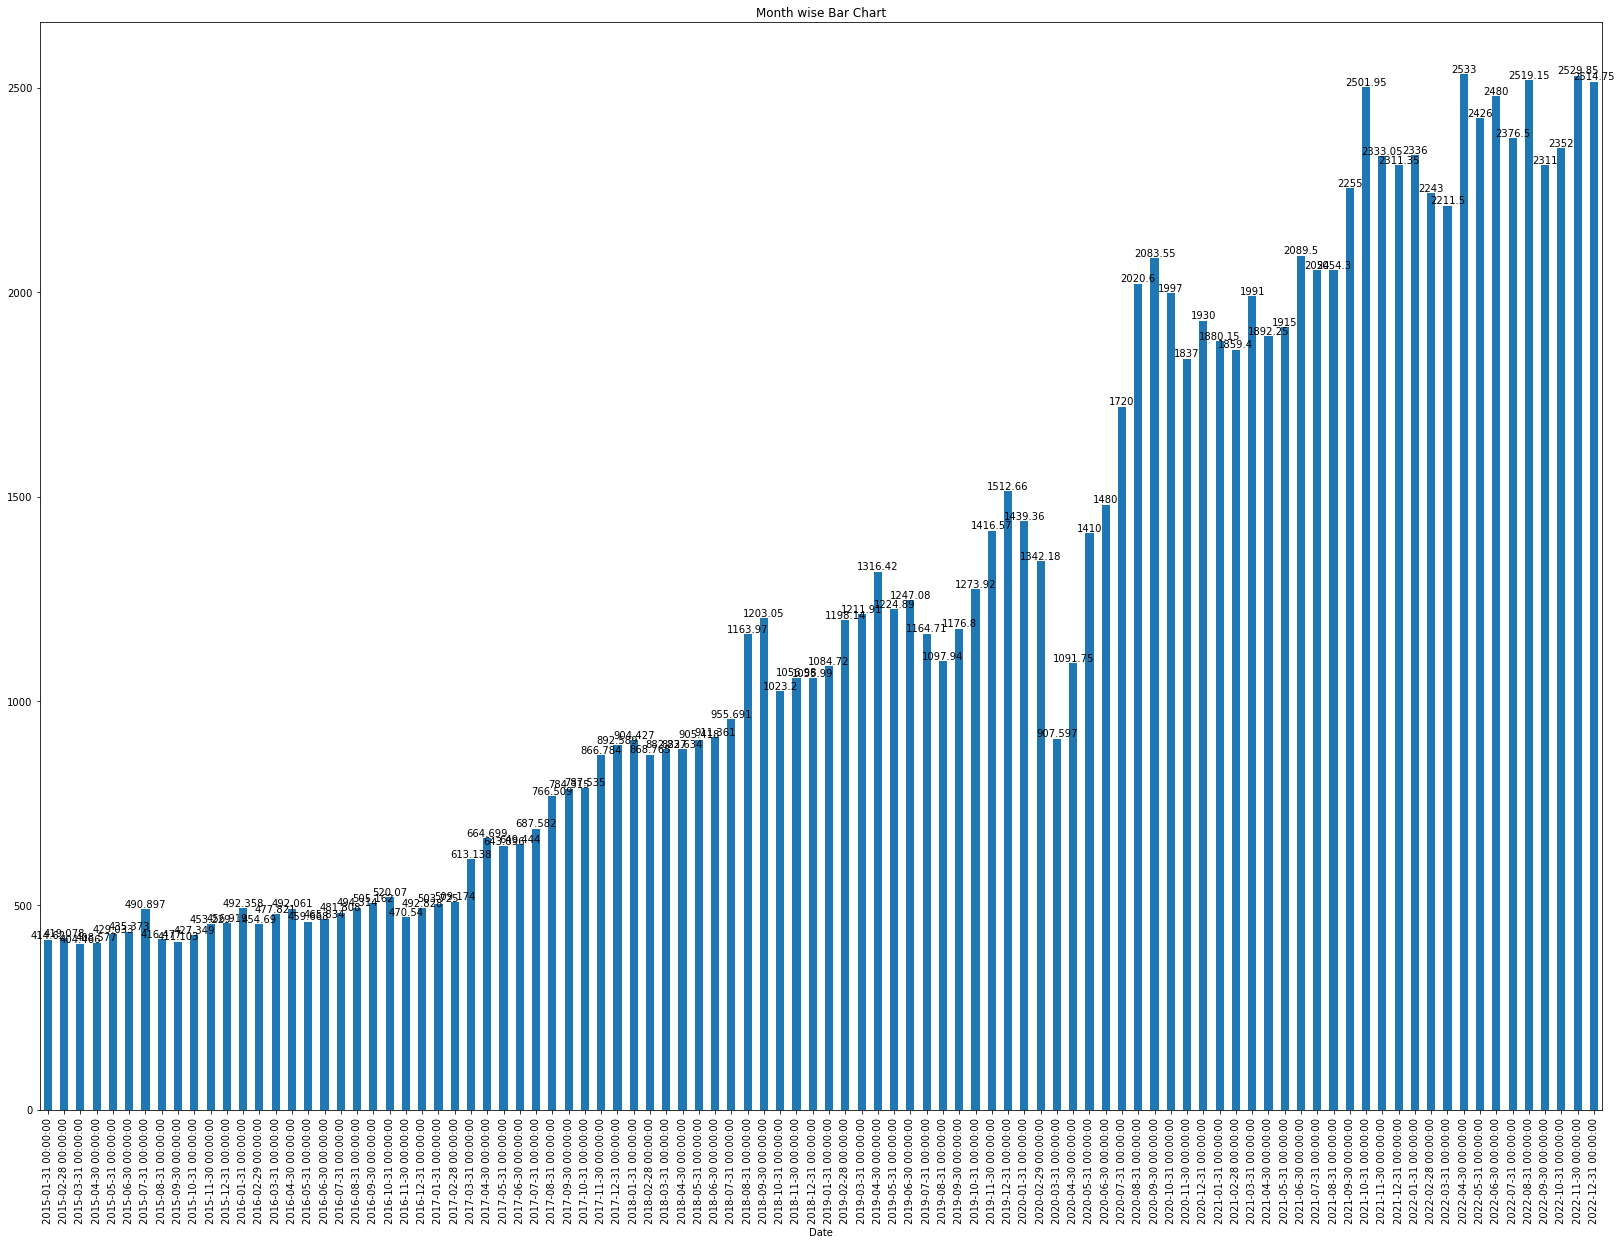

In [37]:
bq = train_data['open'].resample(rule = 'M').min().plot(kind = 'bar', figsize=(28,20))
plt.title("Month wise Bar Chart")
for i in bq.containers:
    bq.bar_label(i,)

### For High Column (Year wise)

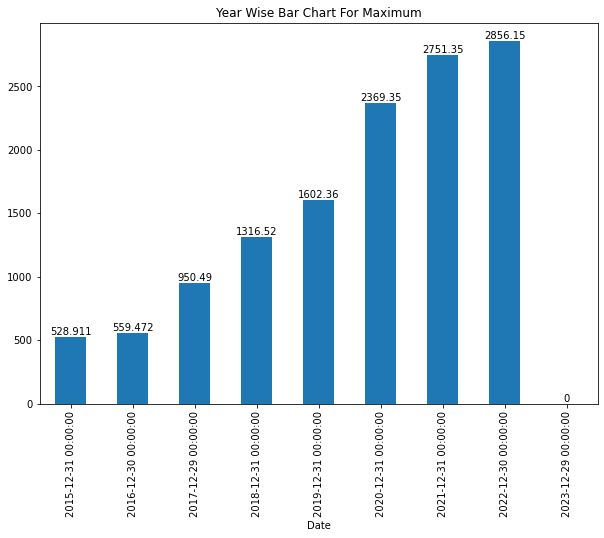

In [38]:
cy = train_data['high'].resample(rule = 'BA').max().plot(kind = 'bar' ,figsize = (10,7))
plt.title("Year Wise Bar Chart For Maximum")
for i in cy.containers:
    cy.bar_label(i,)

### For Low Column (Year wise)

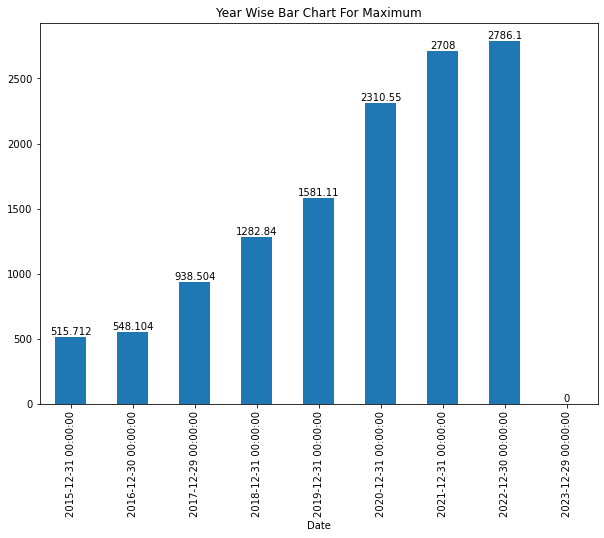

In [39]:
cx = train_data['low'].resample(rule = 'BA').max().plot(kind = 'bar' ,figsize = (10,7))
plt.title("Year Wise Bar Chart For Maximum")
for i in cx.containers:
    cx.bar_label(i,)

## Outlier Detection

<AxesSubplot:xlabel='volume'>

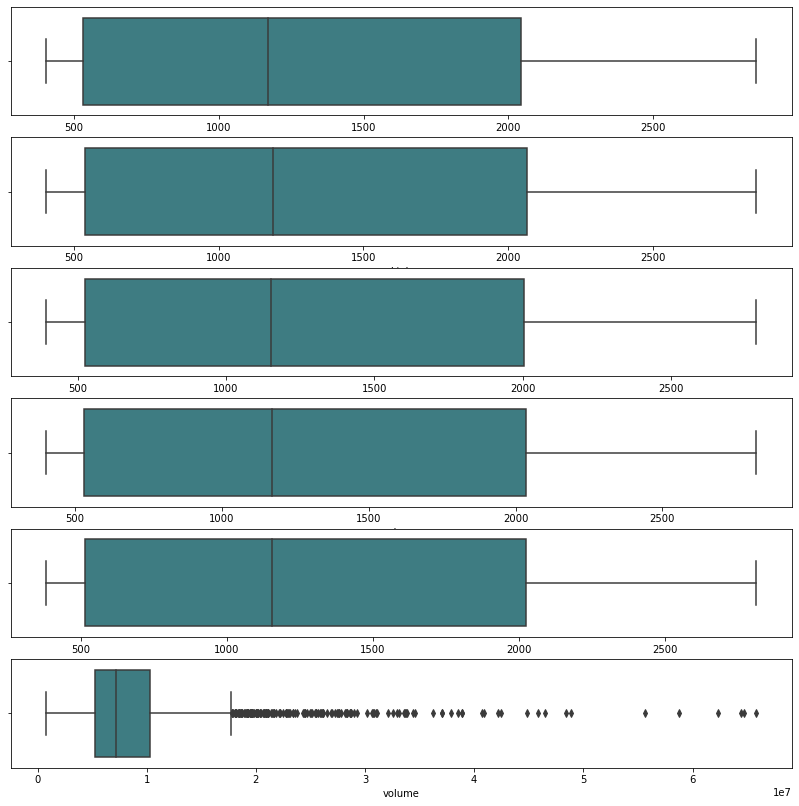

In [40]:
od = train_data.copy()
fig,axes = plt.subplots(6,1,figsize=(14,14))
sns.boxplot(x="open",data=od,palette='crest',ax=axes[0])
sns.boxplot(x="high",data=od,palette='crest',ax=axes[1])
sns.boxplot(x="low",data=od,palette='crest',ax=axes[2])
sns.boxplot(x="close",data=od,palette='crest',ax=axes[3])
sns.boxplot(x="adj_close",data=od,palette='crest',ax=axes[4])
sns.boxplot(x="volume",data=od,palette='crest',ax=axes[5])

### Interpretation - 
- We can see that 50% of stock price for open and close lies between 500-2000, median is approximately 1250, in first quartile variance is less while in 3rd and 4th quartile variance is more as the stock prices are increasing year wise.
- Data is Right Skewed.
- We can see outliers for volume of the stocks.

## Boxplot For Open Column

<AxesSubplot:xlabel='weekday', ylabel='open'>

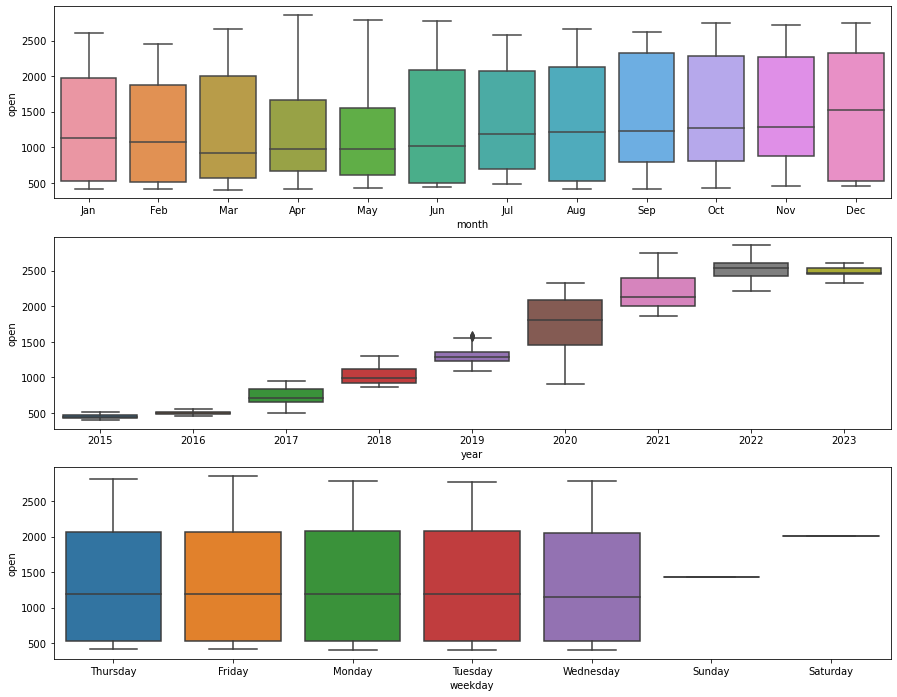

In [41]:
plt.figure(figsize=(15,12))
plt.subplot(311)
sns.boxplot(x = "month", y = "open", data = stock_final)
plt.subplot(312)
sns.boxplot(x = "year", y = "open", data = stock_final)
plt.subplot(313)
sns.boxplot(x = "weekday", y = "open", data = stock_final)

### Interpretation - 
- We can see in Dec Month the variance is more.
- Year wise the varinace is more for 2020 and less for 2015,2016 and 2019.

## Boxplot For Close Column

<AxesSubplot:xlabel='weekday', ylabel='high'>

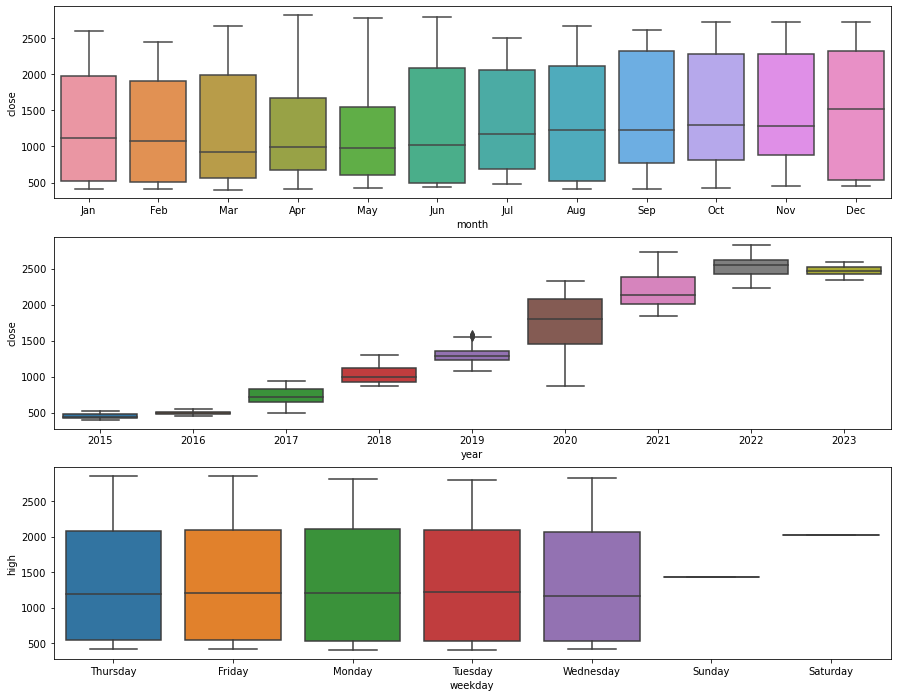

In [42]:
plt.figure(figsize=(15,12))
plt.subplot(311)
sns.boxplot(x = "month", y = "close", data = stock_final)
plt.subplot(312)
sns.boxplot(x = "year", y = "close", data = stock_final)
plt.subplot(313)
sns.boxplot(x = "weekday", y = "high", data = stock_final)

### Interpretation - 
- We can see in Dec Month the variance is more.
- Year wise the varinace is more for 2020 and less for 2015,2016 and 2019.

## Boxplot For High Column

<AxesSubplot:xlabel='weekday', ylabel='high'>

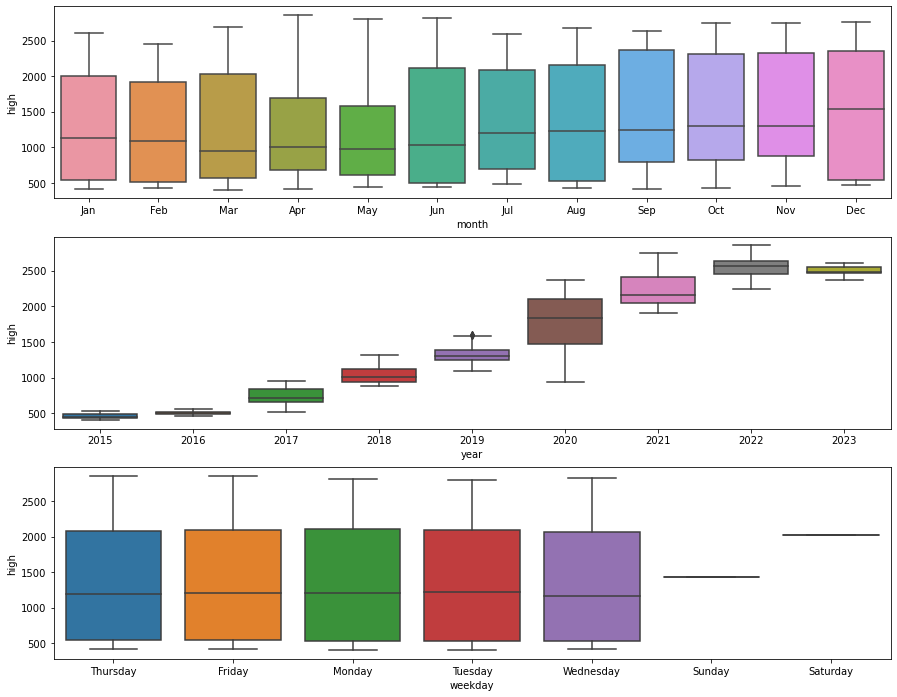

In [43]:
plt.figure(figsize=(15,12))
plt.subplot(311)
sns.boxplot(x = "month", y = "high", data = stock_final)
plt.subplot(312)
sns.boxplot(x = "year", y = "high", data = stock_final)
plt.subplot(313)
sns.boxplot(x = "weekday", y = "high", data = stock_final)

## Boxplot For Low Column

<AxesSubplot:xlabel='weekday', ylabel='low'>

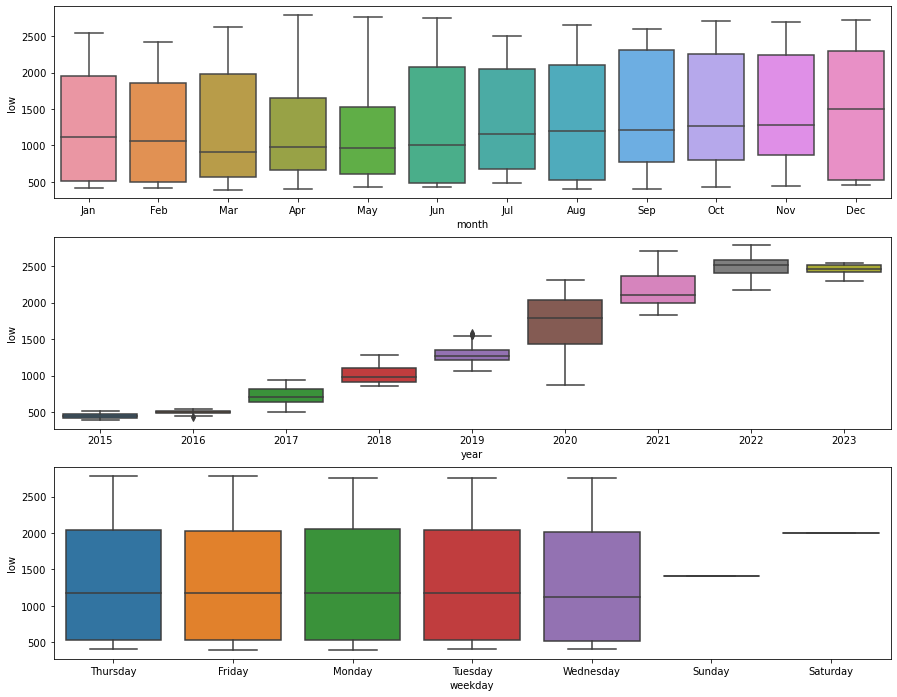

In [44]:
plt.figure(figsize=(15,12))
plt.subplot(311)
sns.boxplot(x = "month", y = "low", data = stock_final)
plt.subplot(312)
sns.boxplot(x = "year", y = "low", data = stock_final)
plt.subplot(313)
sns.boxplot(x = "weekday", y = "low", data = stock_final)

## Boxplot For Adj.Close Column

<AxesSubplot:xlabel='weekday', ylabel='high'>

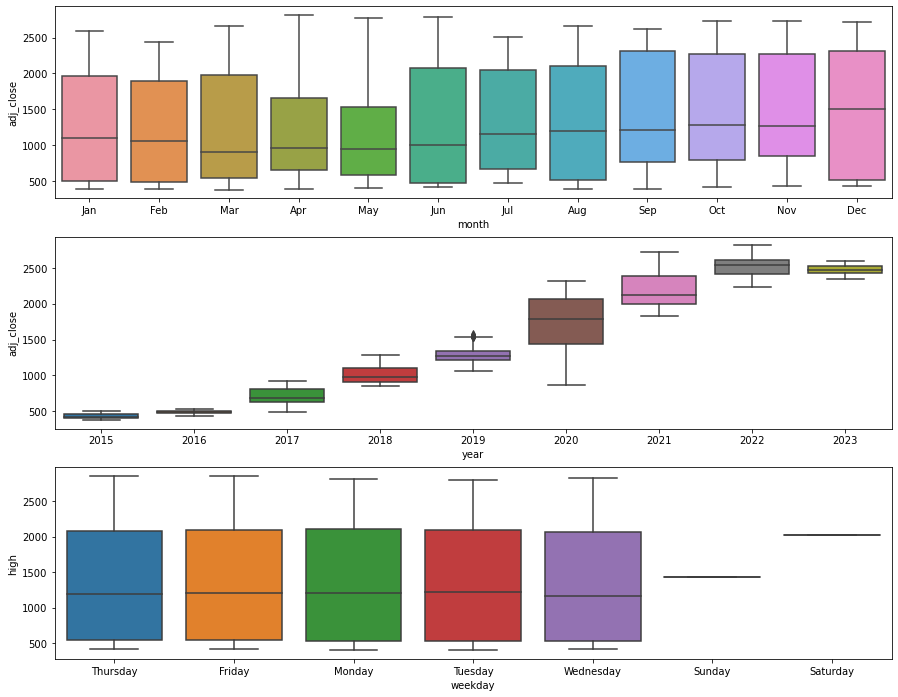

In [45]:
plt.figure(figsize=(15,12))
plt.subplot(311)
sns.boxplot(x = "month", y = "adj_close", data = stock_final)
plt.subplot(312)
sns.boxplot(x = "year", y = "adj_close", data = stock_final)
plt.subplot(313)
sns.boxplot(x = "weekday", y = "high", data = stock_final)

## Boxplot For Volume Column

<AxesSubplot:xlabel='weekday', ylabel='high'>

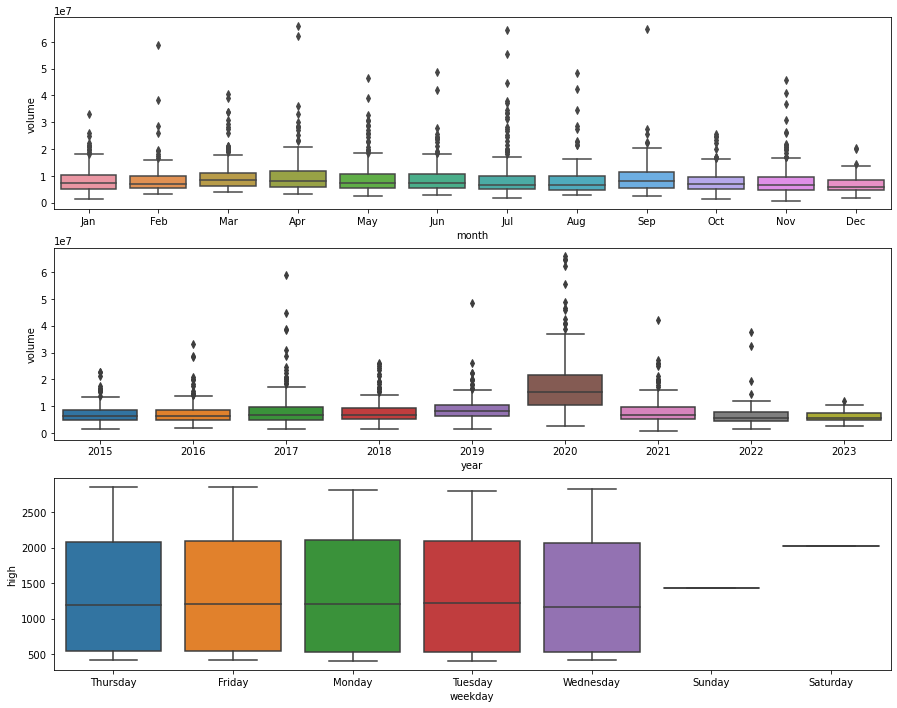

In [46]:
plt.figure(figsize=(15,12))
plt.subplot(311)
sns.boxplot(x = "month", y = "volume", data = stock_final)
plt.subplot(312)
sns.boxplot(x = "year", y = "volume", data = stock_final)
plt.subplot(313)
sns.boxplot(x = "weekday", y = "high", data = stock_final)

- Outliers present in volume column

## Histograms

Text(0.5, 1.0, 'Histogram of Volume in Stock Data')

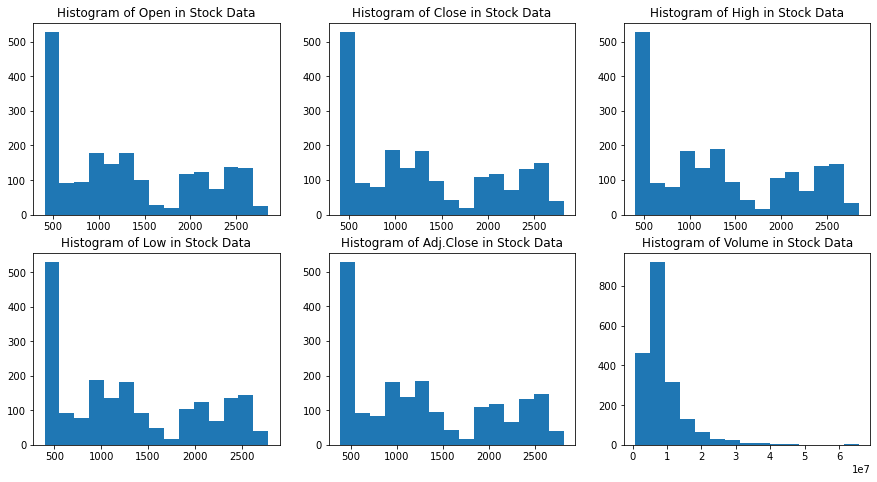

In [47]:
plt.figure(figsize=(15,12))
plt.subplot(3,3,1)
plt.hist(train_data.open, bins = 15)
plt.title("Histogram of Open in Stock Data")

plt.subplot(3,3,2)
plt.hist(train_data.close, bins = 15)
plt.title("Histogram of Close in Stock Data")
           
plt.subplot(3,3,3)
plt.hist(train_data.high, bins = 15)
plt.title("Histogram of High in Stock Data")
           
plt.subplot(3,3,4)
plt.hist(train_data.low, bins = 15)
plt.title("Histogram of Low in Stock Data")

plt.subplot(3,3,5)
plt.hist(train_data.adj_close, bins = 15)
plt.title("Histogram of Adj.Close in Stock Data")
           
plt.subplot(3,3,6)
plt.hist(train_data.volume, bins = 15)
plt.title("Histogram of Volume in Stock Data")

### Insights -
- All the columns except the volume column looks like bimodal distribution - There might be 2 modes and 2 distinct cluster of data.
- The volume column looks right skewed as a long tail present there on the right side.

## Scatterplot

### For Open Column

<AxesSubplot:xlabel='open', ylabel='close'>

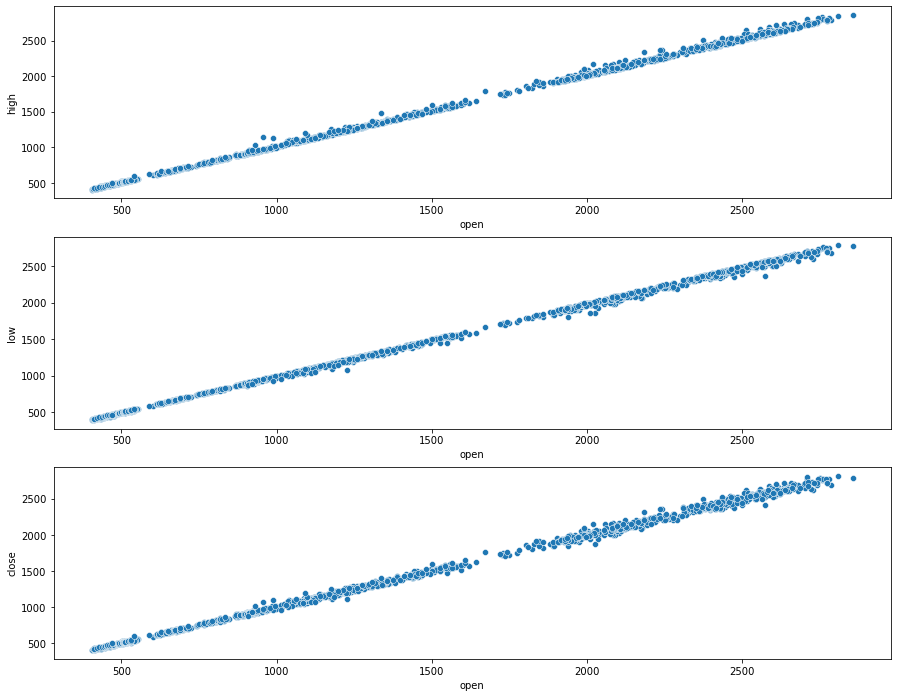

In [48]:
plt.figure(figsize=(15,12))

plt.subplot(3,1,1)
sns.scatterplot(x = "open", y = "high", data = train_data)

plt.subplot(3,1,2)
sns.scatterplot(x = "open", y = "low", data = train_data)

plt.subplot(3,1,3)
sns.scatterplot(x = "open", y = "close", data = train_data)

### Insights -
- There is a liner strong positive correlation of open column with all other columns (high,low & close) 

### For Close column

<AxesSubplot:xlabel='close', ylabel='low'>

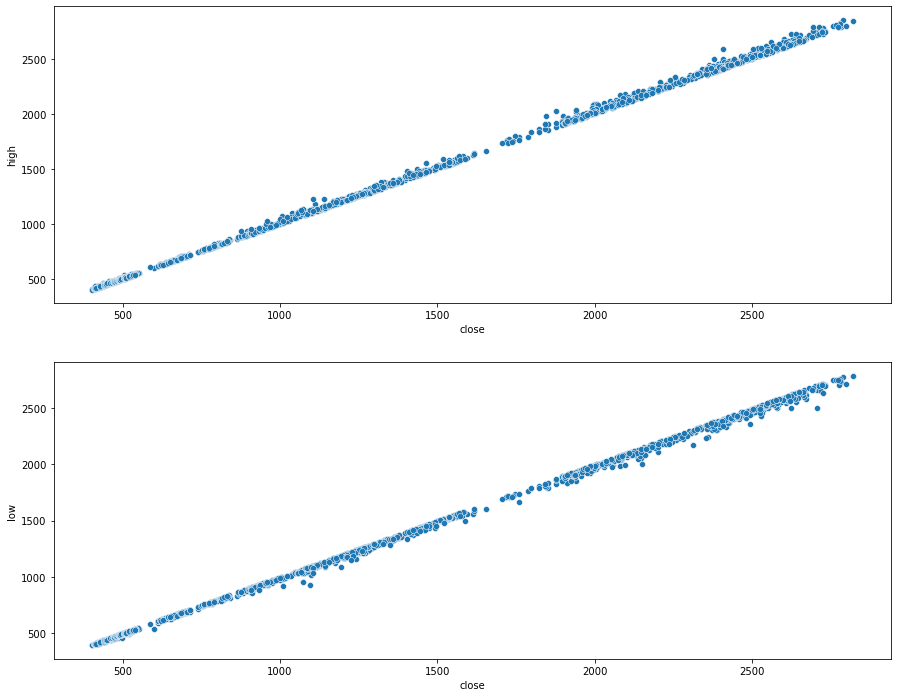

In [49]:
plt.figure(figsize=(15,12))

plt.subplot(2,1,1)
sns.scatterplot(x = "close", y = "high", data = train_data)

plt.subplot(2,1,2)
sns.scatterplot(x = "close", y = "low", data = train_data)

### Insights -
- There is a liner strong positive correlation of close column with all other columns (high,low & open) 

## Pair Plot

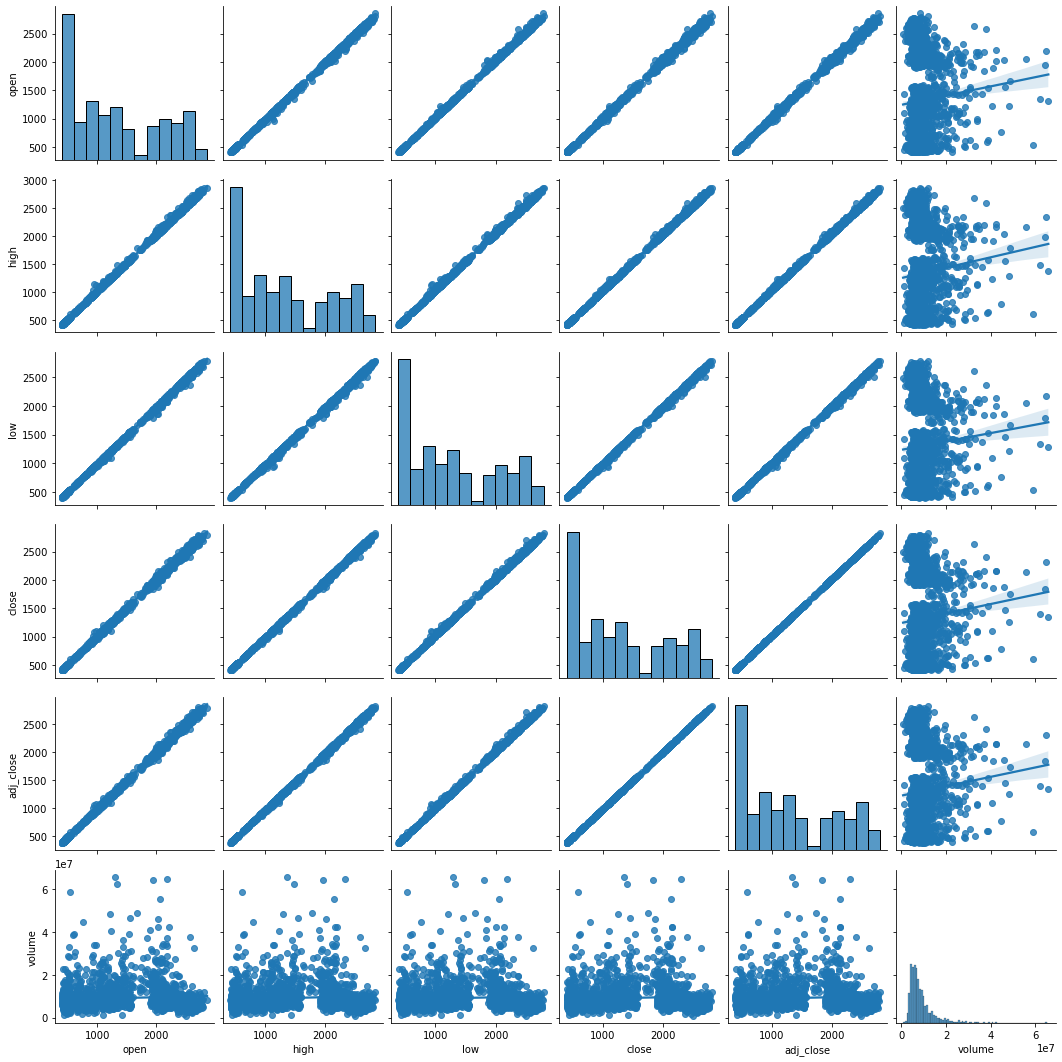

In [50]:
# with regression
sns.pairplot(train_data, kind="reg")
plt.show()

### Insights -
- All columns are correlated with each other expect the volume column.

## Line Plot 

### For Open Column

Text(0.5, 1.0, 'Day Wise Opening Price of Stock')

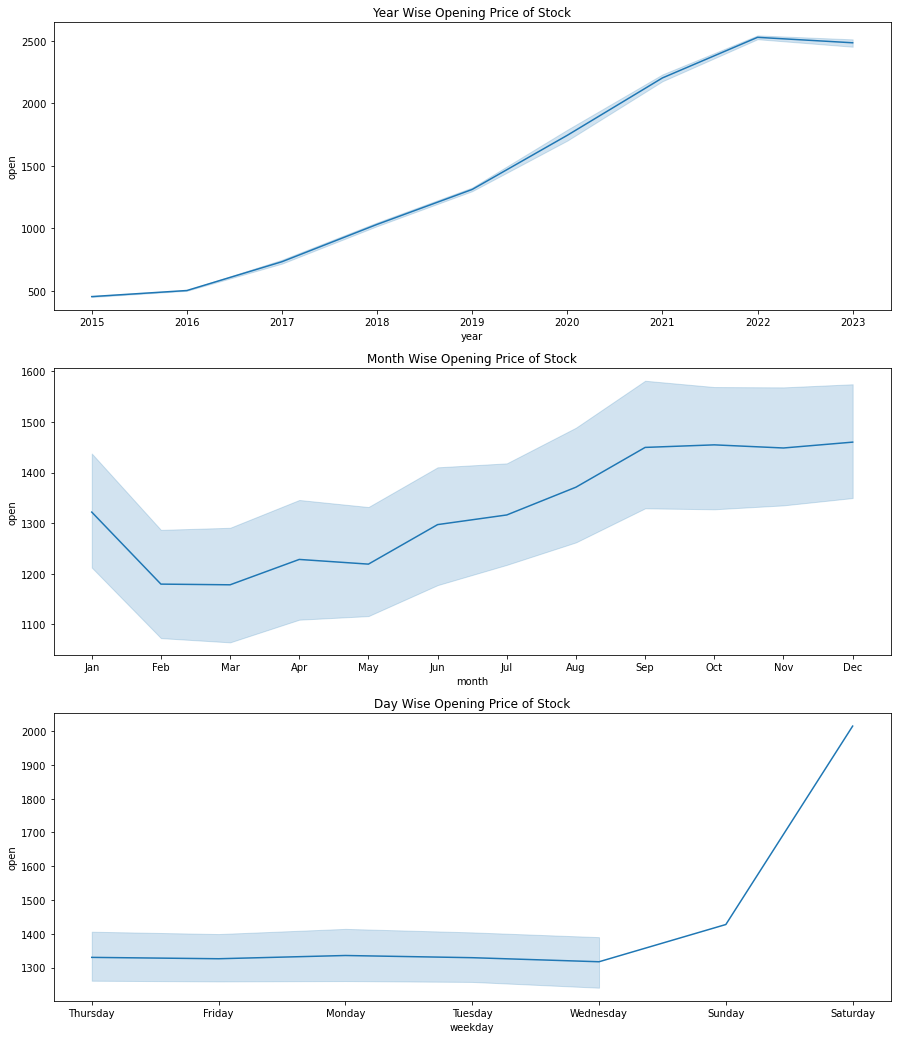

In [51]:
plt.figure(figsize=(15,18))

plt.subplot(3,1,1)
sns.lineplot(x = "year", y = "open", data = stock_final)
plt.title("Year Wise Opening Price of Stock")

plt.subplot(3,1,2)
sns.lineplot(x = "month", y = "open", data = stock_final)
plt.title("Month Wise Opening Price of Stock")

plt.subplot(3,1,3)
sns.lineplot(x = "weekday", y = "open", data = stock_final)
plt.title("Day Wise Opening Price of Stock")

### Insights - 
- The Stock Price for Open is incresing year wise.
- For month first its looks decreasing from jan-feb , seems stationary from feb-may and seems increasing during may-dec.

### For Close Column

Text(0.5, 1.0, 'Day Wise closing Price of Stock')

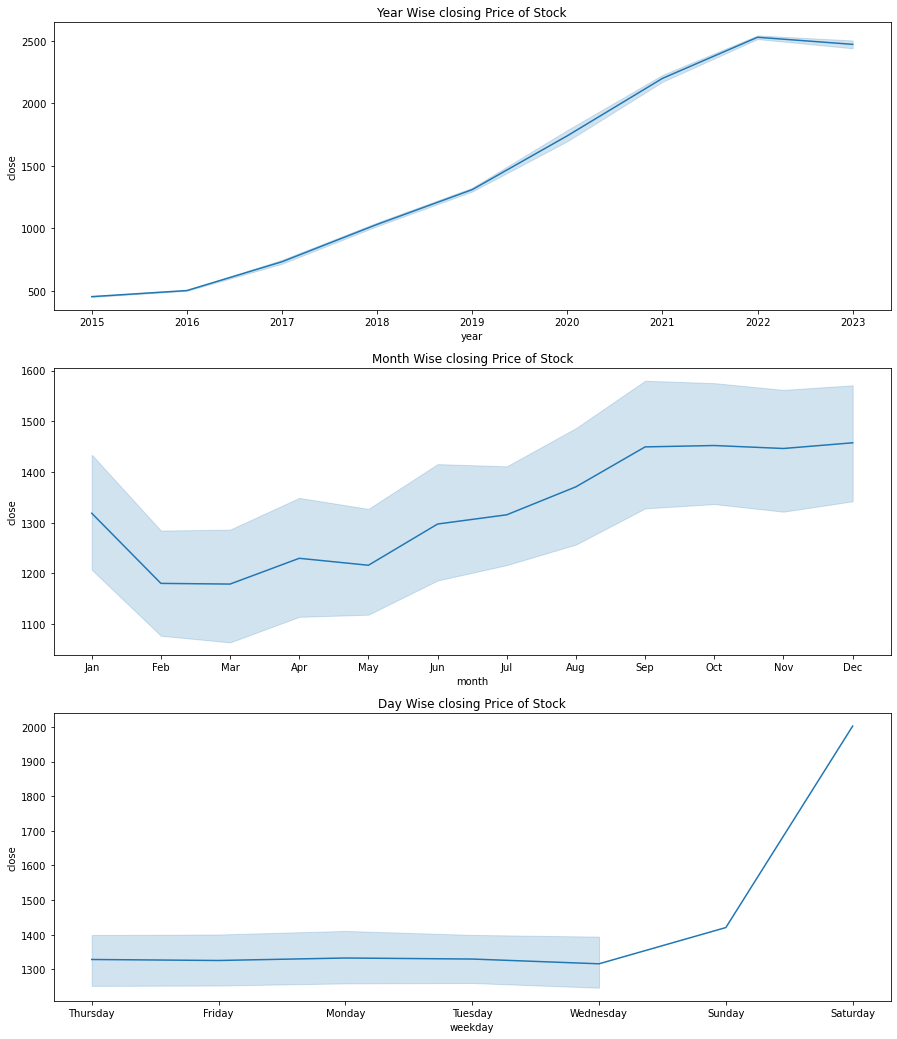

In [52]:
plt.figure(figsize=(15,18))

plt.subplot(3,1,1)
sns.lineplot(x = "year", y = "close", data = stock_final)
plt.title("Year Wise closing Price of Stock")

plt.subplot(3,1,2)
sns.lineplot(x = "month", y = "close", data = stock_final)
plt.title("Month Wise closing Price of Stock")

plt.subplot(3,1,3)
sns.lineplot(x = "weekday", y = "close", data = stock_final)
plt.title("Day Wise closing Price of Stock")

### Insights - 
- The Stock Price for Close is incresing year wise.
- For month first its looks decreasing from jan-feb , seems stationary from feb-may and seems increasing during may-dec.

### Line Plot High Column

Text(0.5, 1.0, 'Day Wise high Price of Stock')

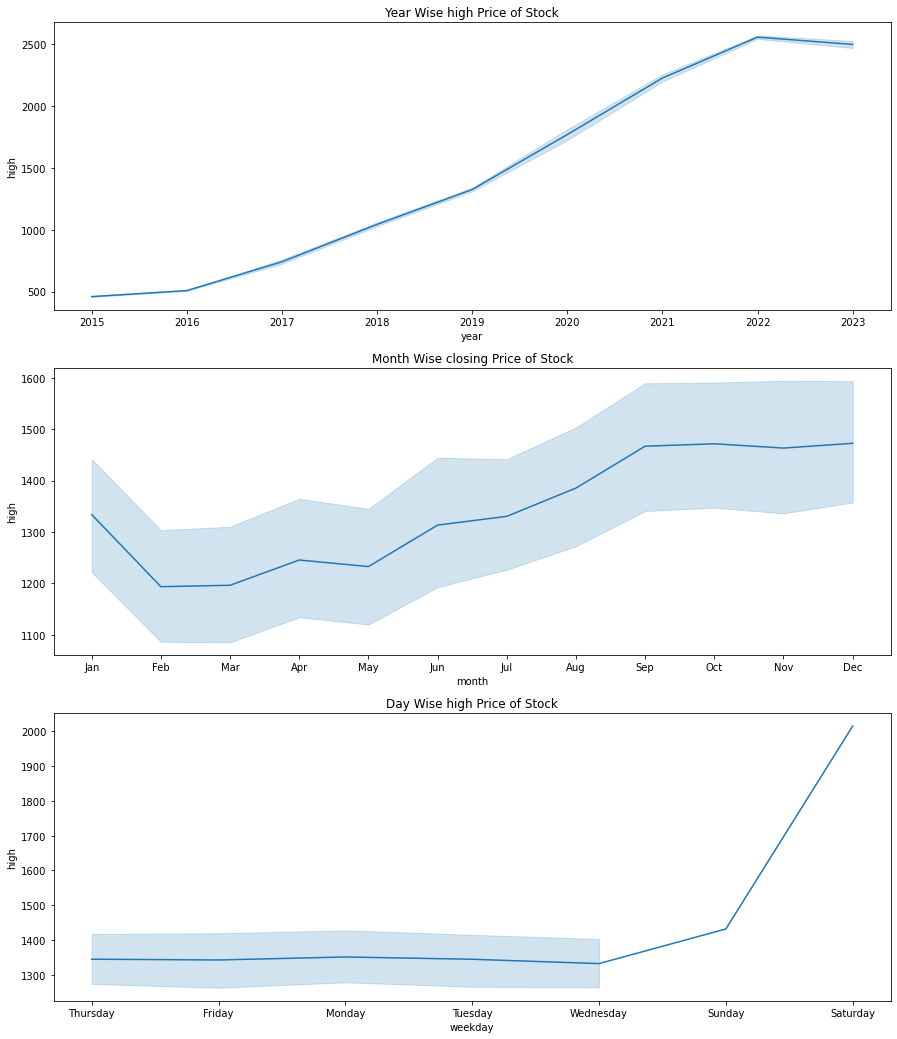

In [53]:
plt.figure(figsize=(15,18))

plt.subplot(3,1,1)
sns.lineplot(x = "year", y = "high", data = stock_final)
plt.title("Year Wise high Price of Stock")

plt.subplot(3,1,2)
sns.lineplot(x = "month", y = "high", data = stock_final)
plt.title("Month Wise closing Price of Stock")

plt.subplot(3,1,3)
sns.lineplot(x = "weekday", y = "high", data = stock_final)
plt.title("Day Wise high Price of Stock")

### For Low Column

Text(0.5, 1.0, 'Day Wise low Price of Stock')

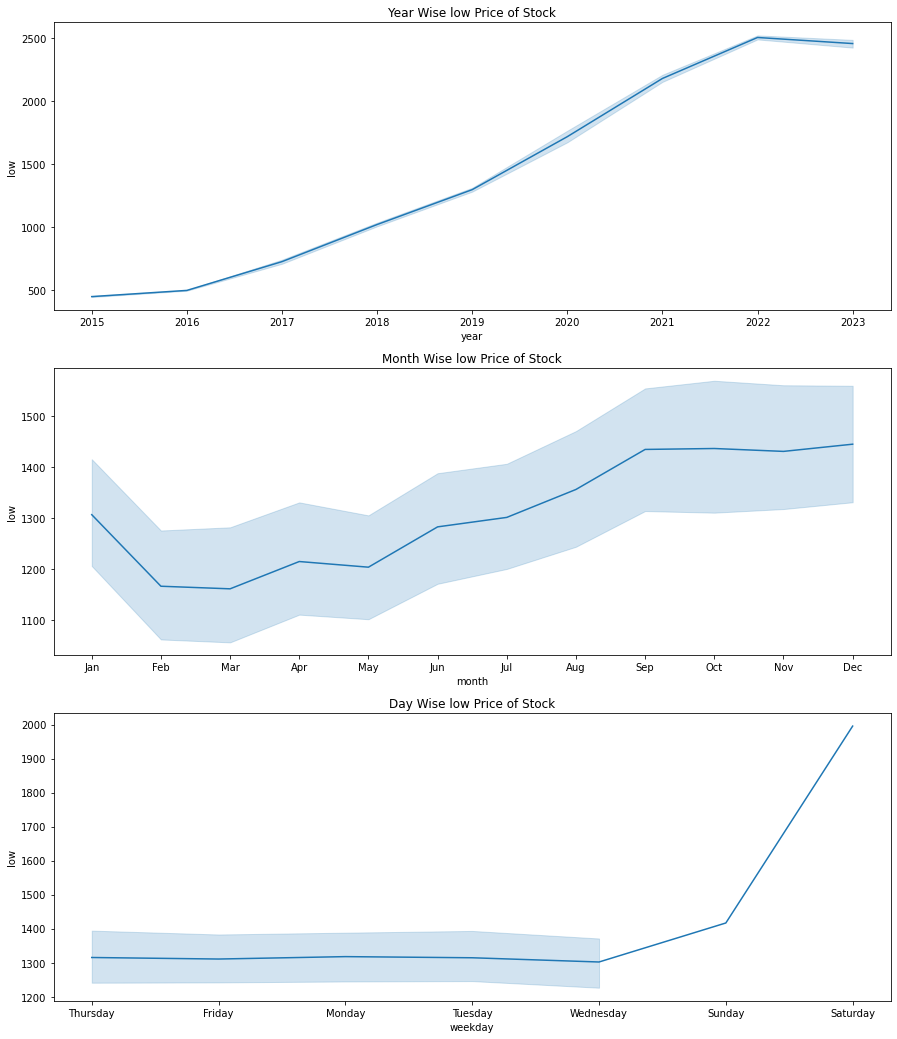

In [54]:
plt.figure(figsize=(15,18))

plt.subplot(3,1,1)
sns.lineplot(x = "year", y = "low", data = stock_final)
plt.title("Year Wise low Price of Stock")

plt.subplot(3,1,2)
sns.lineplot(x = "month", y = "low", data = stock_final)
plt.title("Month Wise low Price of Stock")

plt.subplot(3,1,3)
sns.lineplot(x = "weekday", y = "low", data = stock_final)
plt.title("Day Wise low Price of Stock")

### Line Plot Low Column

Text(0.5, 1.0, 'Day Wise volume of Stock')

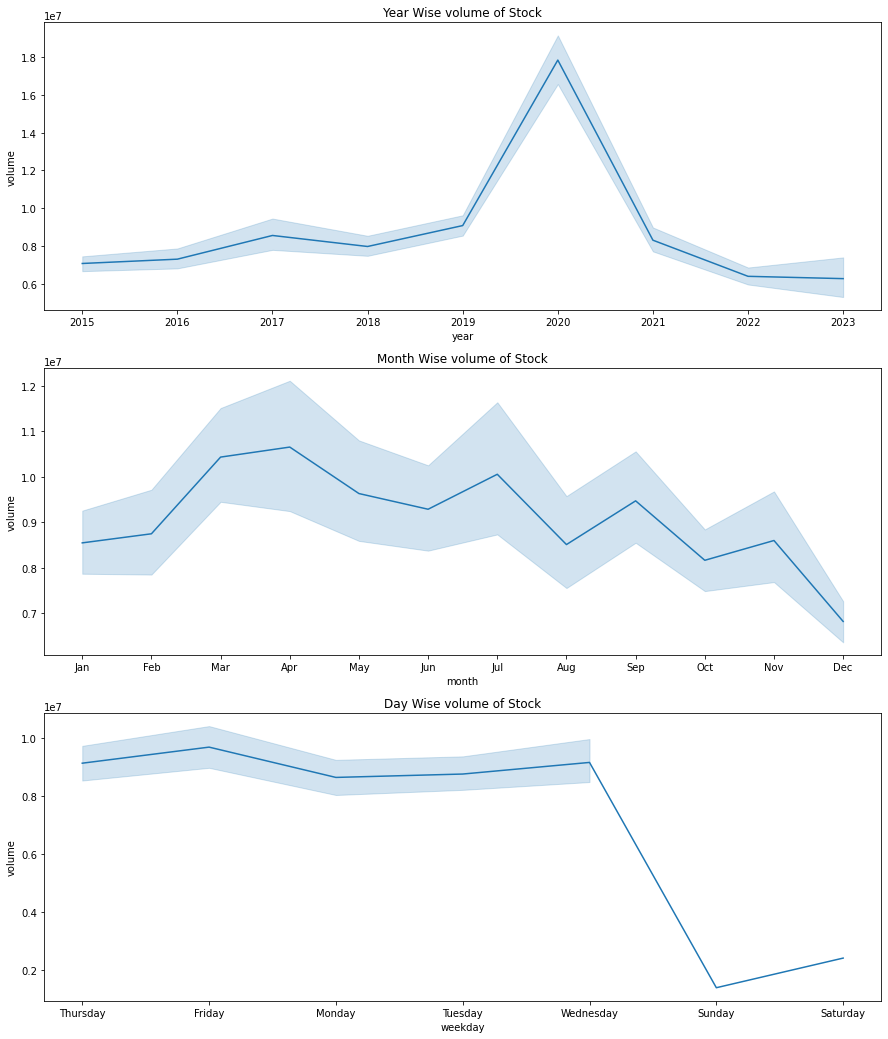

In [55]:
plt.figure(figsize=(15,18))

plt.subplot(3,1,1)
sns.lineplot(x = "year", y = "volume", data = stock_final)
plt.title("Year Wise volume of Stock")

plt.subplot(3,1,2)
sns.lineplot(x = "month", y = "volume", data = stock_final)
plt.title("Month Wise volume of Stock")

plt.subplot(3,1,3)
sns.lineplot(x = "weekday", y = "volume", data = stock_final)
plt.title("Day Wise volume of Stock")

### Insights - 
- The volume of Stock Prices are incresed from 2019-2020 and decreased from 2020-2021 very qiuckly may be due to covid ,now its looks stationary.
- For month there are some variance there.

## Distribution Plot

<AxesSubplot:xlabel='volume', ylabel='Density'>

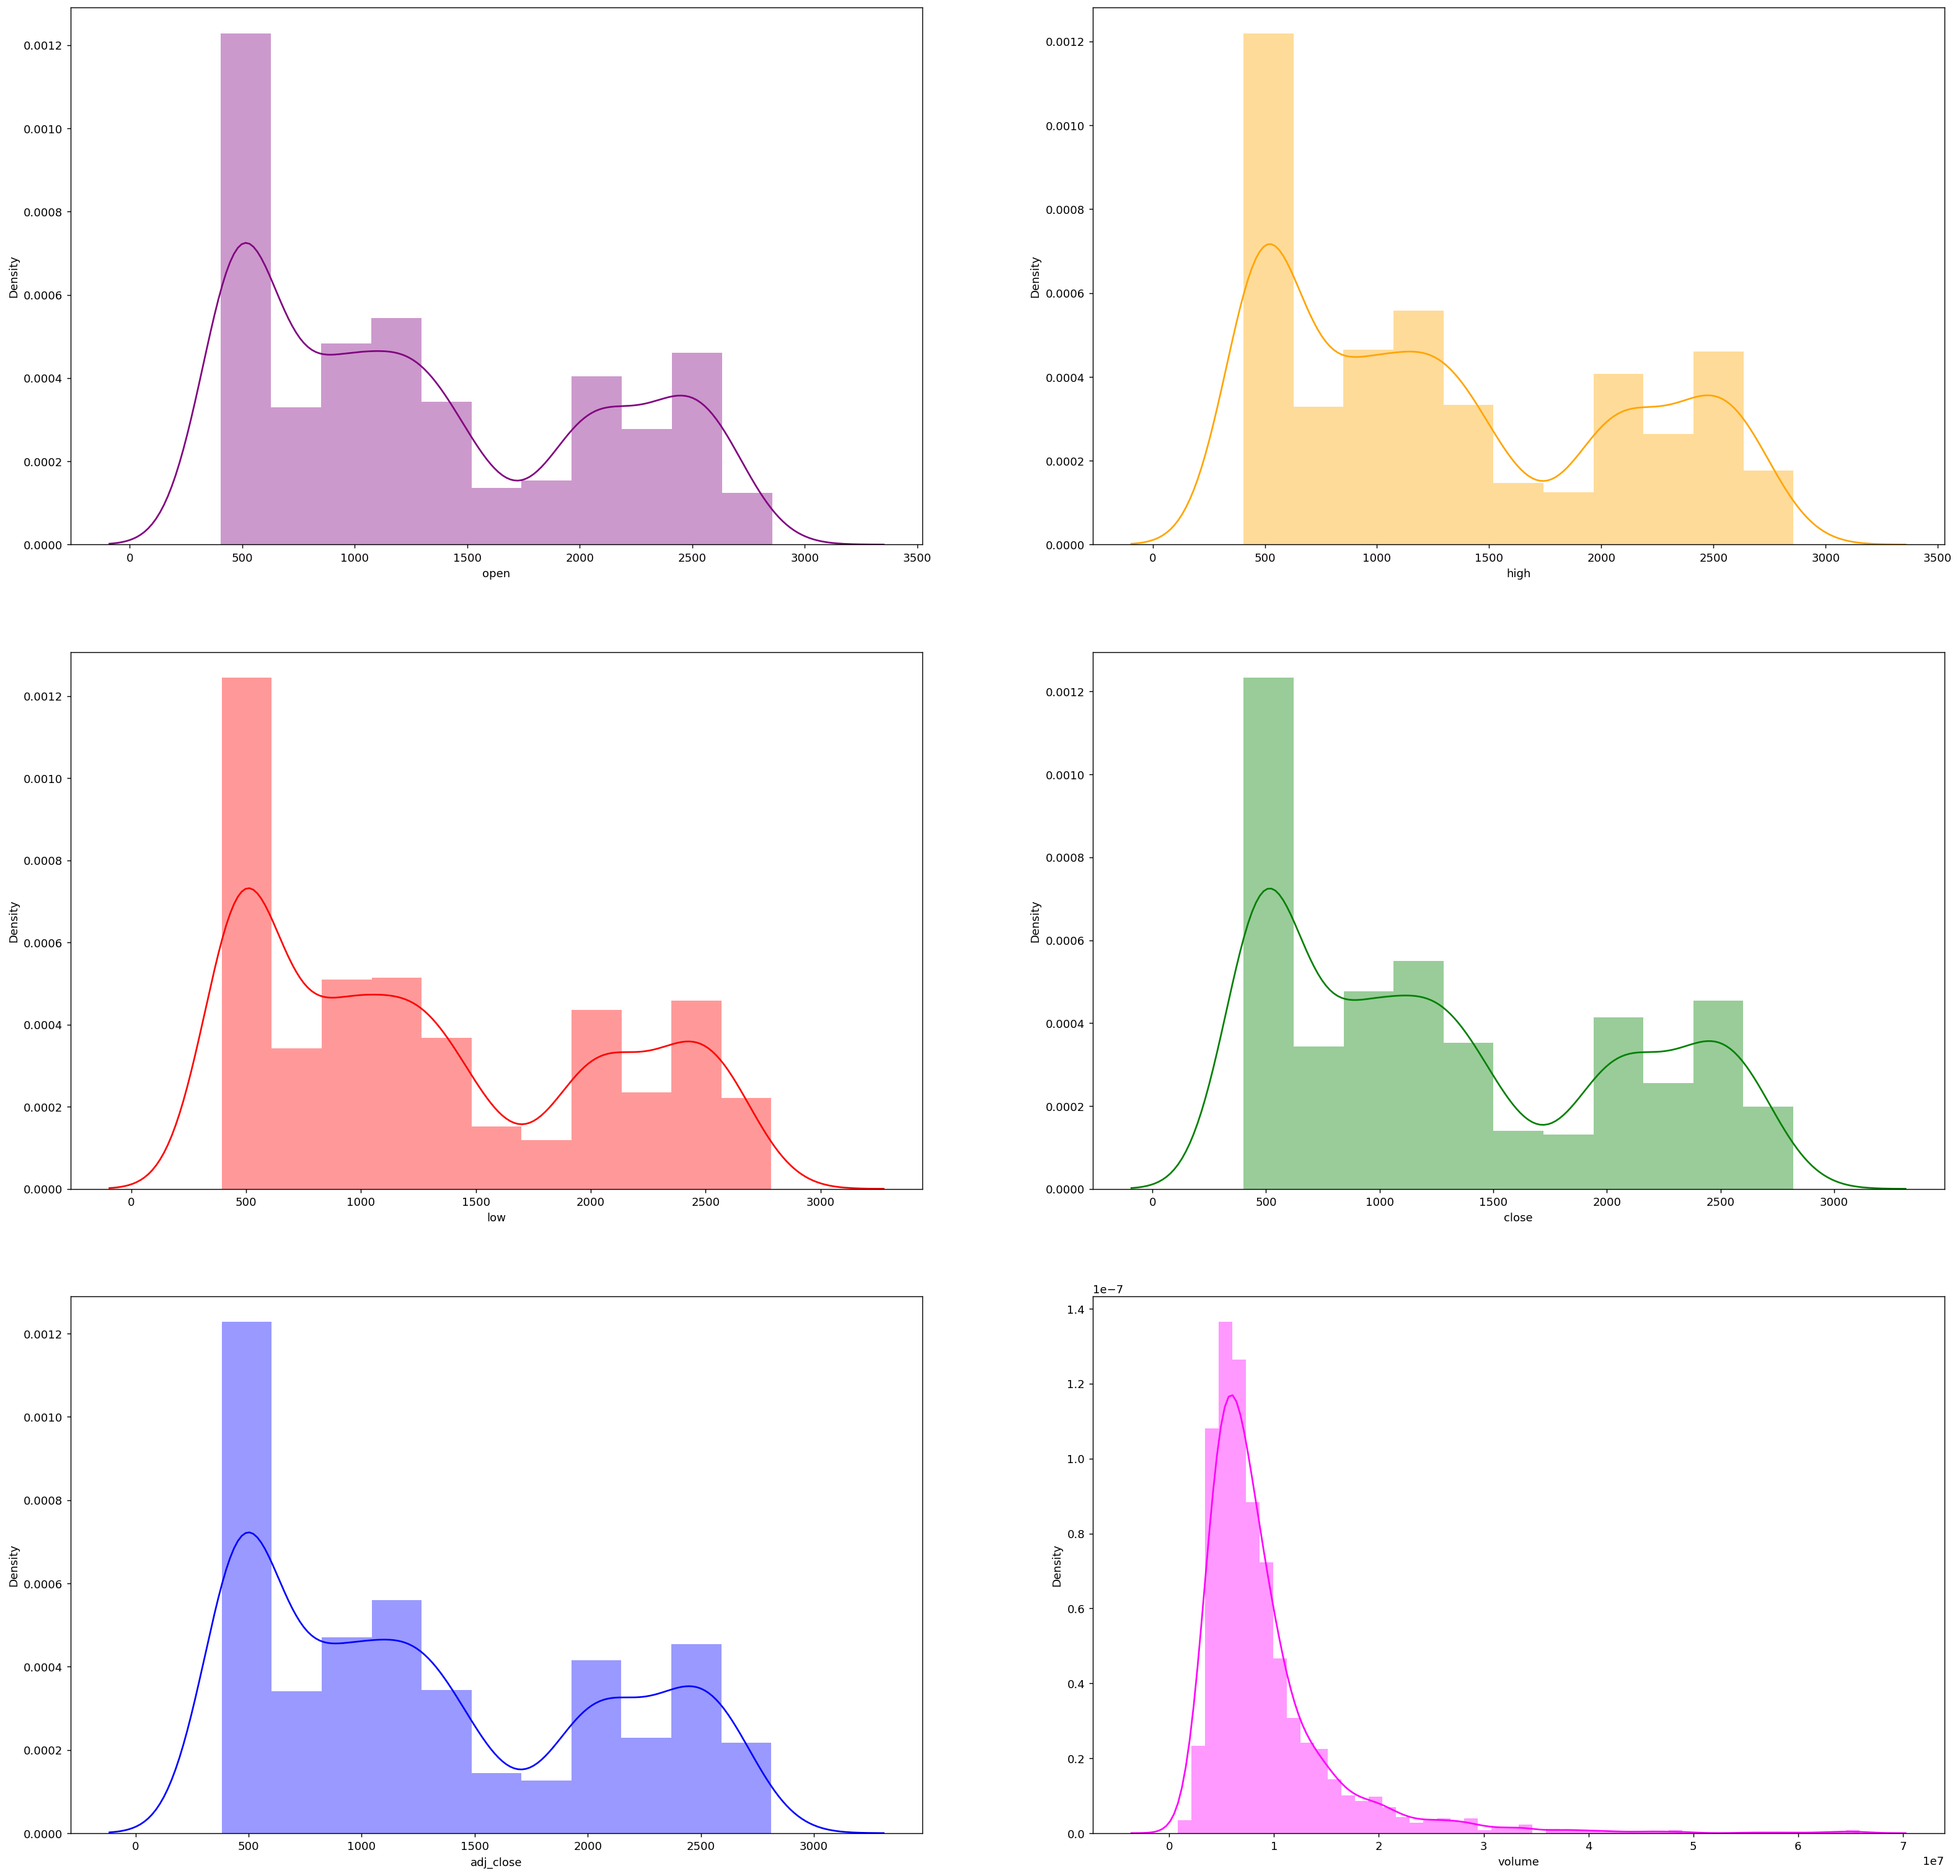

In [56]:
fig, axs= plt.subplots(3,2, figsize=(30,30), dpi=130)

sns.distplot(train_data["open"], ax=axs[0, 0], color = 'purple')
sns.distplot(train_data["high"], ax=axs[0, 1], color = 'orange')
sns.distplot(train_data["low"], ax=axs[1, 0], color = 'red')
sns.distplot(train_data["close"], ax=axs[1, 1], color = 'green')
sns.distplot(train_data["adj_close"], ax=axs[2, 0], color = 'blue')
sns.distplot(train_data["volume"], ax=axs[2, 1], color = 'magenta')

### Insights -
- All the columns follows bimodal distribution where the volume column is Right Skewed.

## Calculating the Market Cap

- Market Capitalization reffered to as market cap, is the total value of a publicly traded company's outstanding common shares owned by stockholders.

In [57]:
stock_final['market_cap'] = stock_final['open']*stock_final['volume']

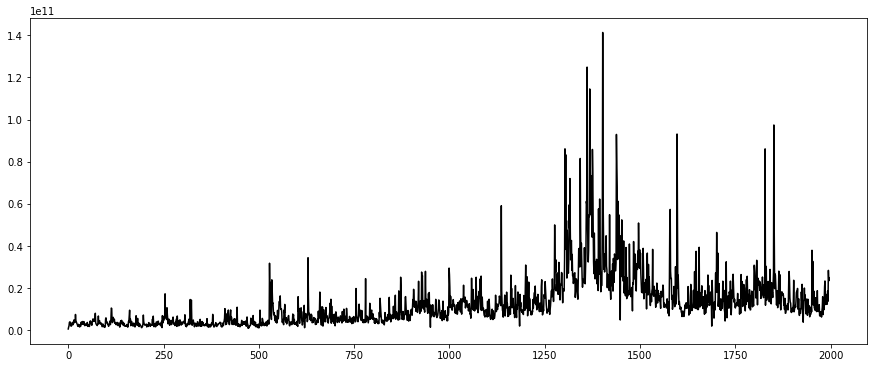

In [58]:
plt.figure(figsize=(15,6))
plt.plot(stock_final['market_cap'], color ='black')

## Chart

Text(0.5, 1.0, 'Open Price Chart Jan,2015 - Dec,2022')

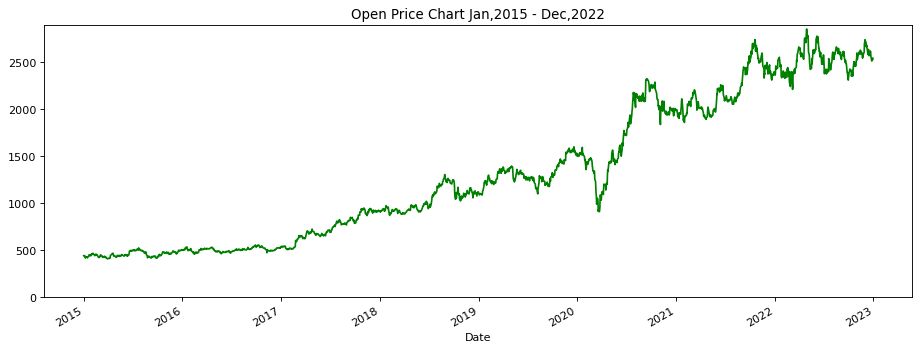

In [59]:
plt.figure(figsize = (14,5), dpi = 80)
train_data["open"].plot(ylim = [0,2900], c = 'green')
plt.title("Open Price Chart Jan,2015 - Dec,2022")

### Insights - 
In March 2020 Reliance Stock open Price was dropped later on it steadily growth till Dec,2022.

Text(0.5, 1.0, 'Close Price Chart Jan,2015 - Dec,2022')

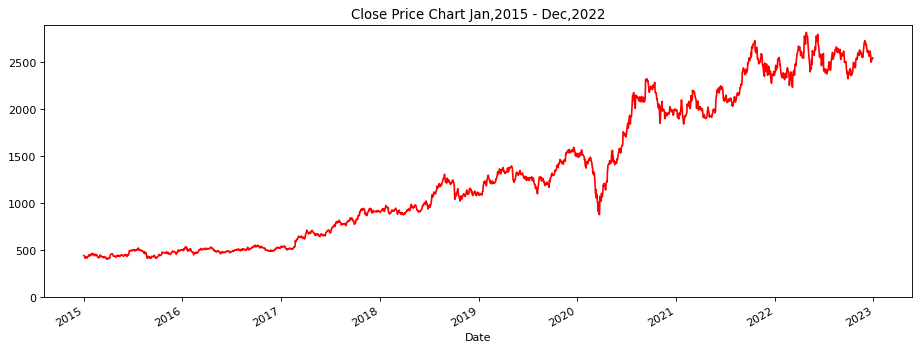

In [60]:
plt.figure(figsize = (14,5), dpi = 80)
train_data["close"].plot(ylim = [0,2900], c = 'red')
plt.title("Close Price Chart Jan,2015 - Dec,2022")

### Insights - 
In March 2020 Reliance Stock close Price was dropped later on it steadily growth till Dec,2022.

<AxesSubplot:xlabel='Date'>

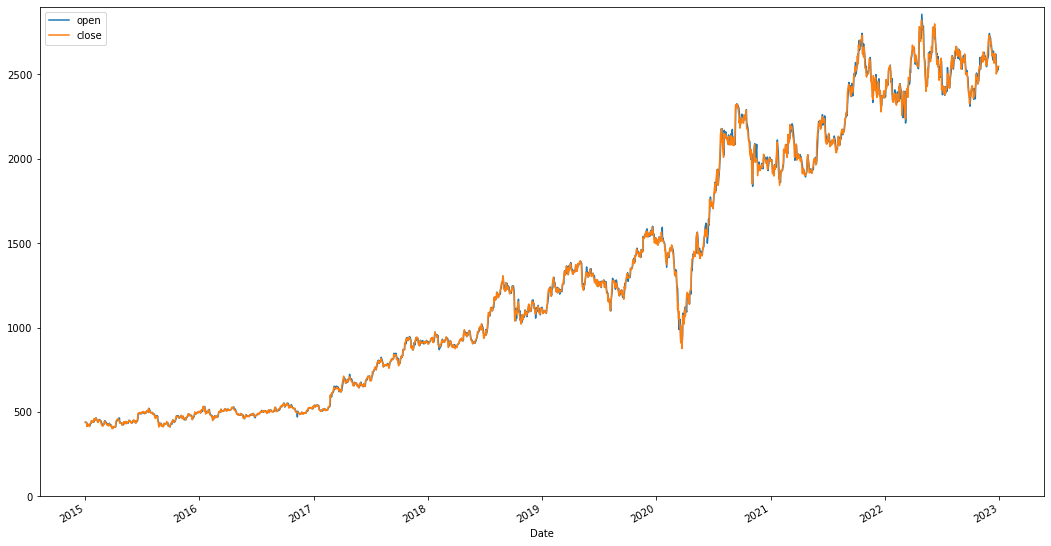

In [61]:
train_data[["open","close"]].plot(ylim = [0,2900], figsize=(18,10))

<AxesSubplot:xlabel='Date'>

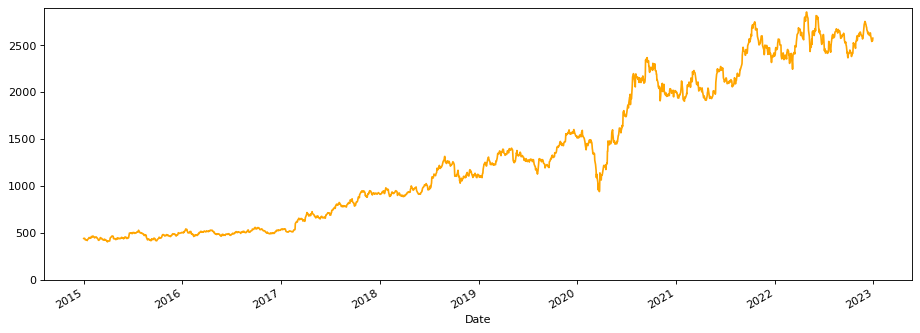

In [62]:
plt.figure(figsize = (14,5), dpi = 80)
train_data["high"].plot(ylim = [0,2900], c = 'orange')

<AxesSubplot:xlabel='Date'>

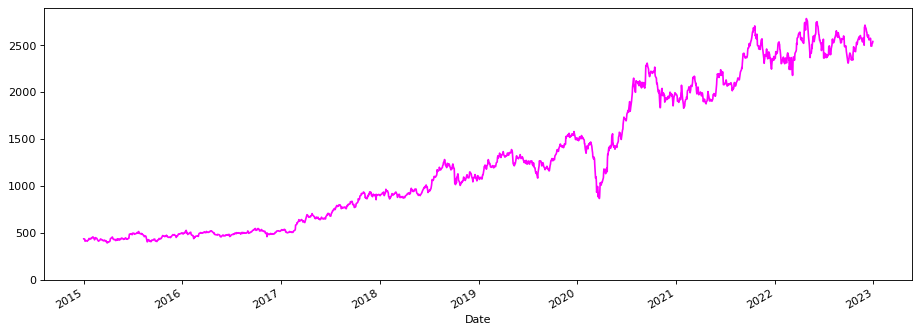

In [63]:
plt.figure(figsize = (14,5), dpi = 80)
train_data["low"].plot(ylim = [0,2900], c = 'magenta')

<AxesSubplot:xlabel='Date'>

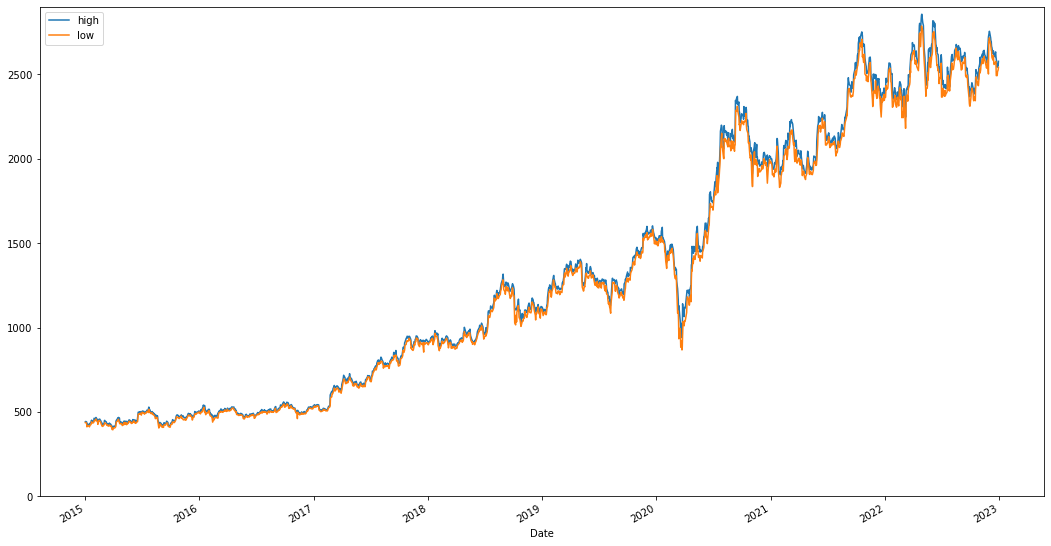

In [64]:
train_data[["high","low"]].plot(ylim = [0,2900], figsize=(18,10))

<AxesSubplot:xlabel='Date'>

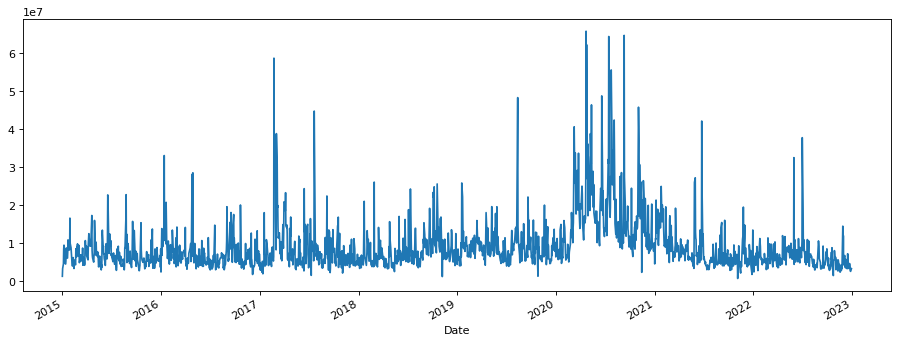

In [65]:
plt.figure(figsize = (14,5), dpi = 80)
train_data["volume"].plot()

- High Volume of Trade happened in year 2020

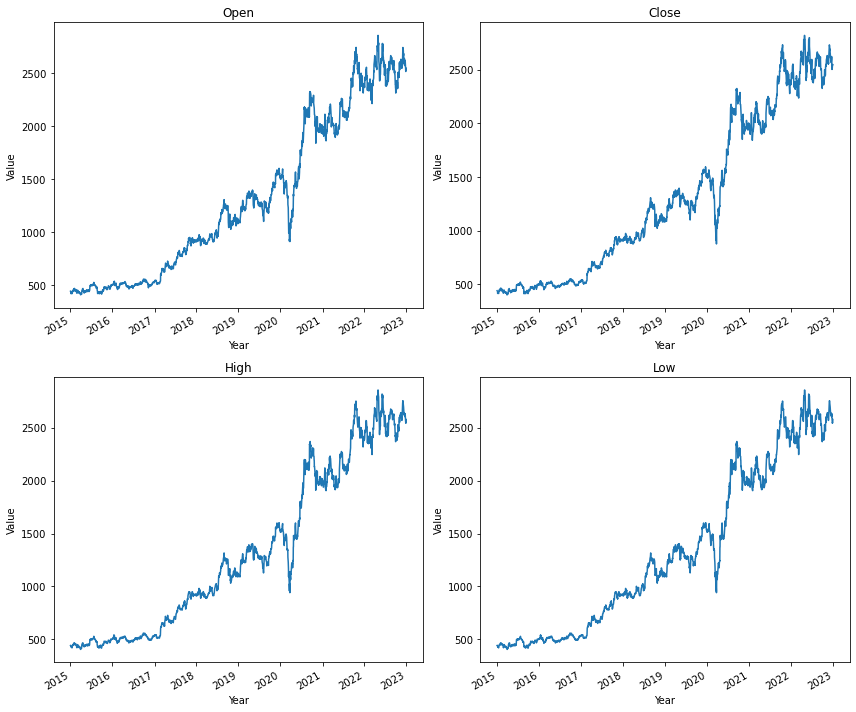

In [66]:
# Having better comparative 
plt.figure(figsize=(12,10))
plt.subplot(2, 2, 1)
train_data.open.plot(kind='line')

plt.title('Open')
plt.ylabel('Value')
plt.xlabel('Year')


plt.subplot(2, 2, 2)
train_data.close.plot(kind='line')

plt.title('Close')
plt.ylabel('Value')
plt.xlabel('Year')

plt.subplot(2, 2, 3)
train_data.high.plot(kind='line')

plt.title('High')
plt.ylabel('Value')
plt.xlabel('Year')

plt.subplot(2, 2, 4)
train_data.high.plot(kind='line')

plt.title('Low')
plt.ylabel('Value')
plt.xlabel('Year')

plt.tight_layout()
plt.show()

## Kde Plot

Text(0.5, 1.0, 'KdePlot of Low')

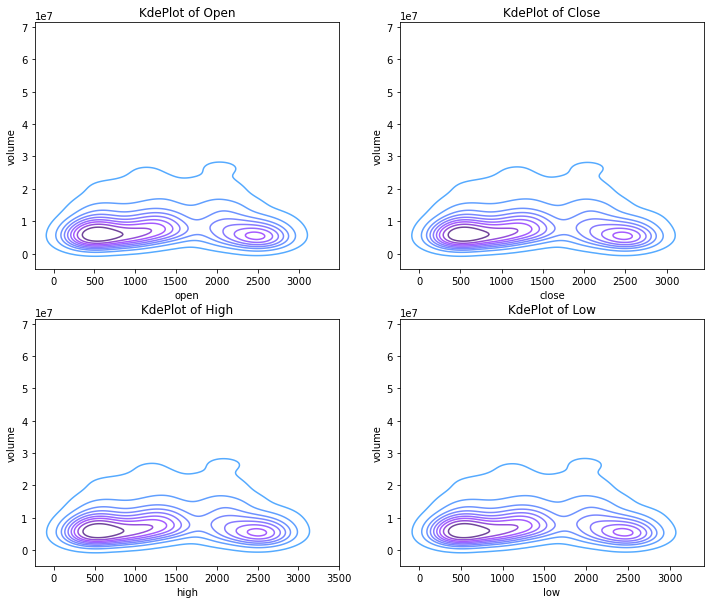

In [67]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.kdeplot(train_data["open"], train_data["volume"], cmap = "cool_d")
plt.title("KdePlot of Open")

plt.subplot(2,2,2)
sns.kdeplot(train_data["close"], train_data["volume"], cmap = "cool_d")
plt.title("KdePlot of Close")
           
plt.subplot(2,2,3)
sns.kdeplot(train_data["high"], train_data["volume"], cmap = "cool_d")
plt.title("KdePlot of High")
           
plt.subplot(2,2,4)
sns.kdeplot(train_data["low"], train_data["volume"], cmap = "cool_d")
plt.title("KdePlot of Low")

## Checking Trend Seasionality and Resids For Open and Close Column

### For Open Column

<Figure size 1080x864 with 0 Axes>

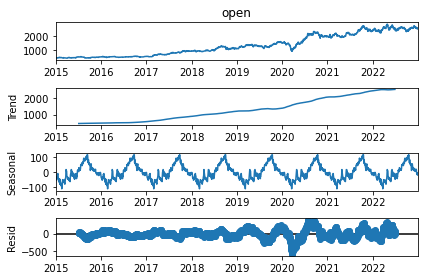

In [68]:
plt.figure(figsize=(15,12))
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(train_data.open,period=250)
decompose_ts_add.plot()
plt.show()

### Insights -
- There is a upward trend and additive seasonality.

### For Close Column

<Figure size 1080x864 with 0 Axes>

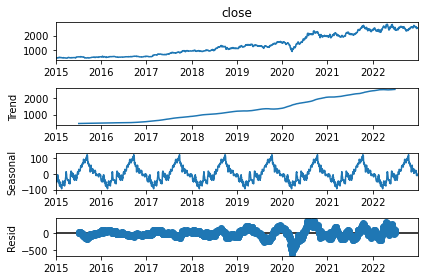

In [69]:
plt.figure(figsize=(15,12))
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(train_data.close,period=250)
decompose_ts_add.plot()
plt.show()

### Insights -
- There is a upward trend and additive seasonality.

## MovingAverage

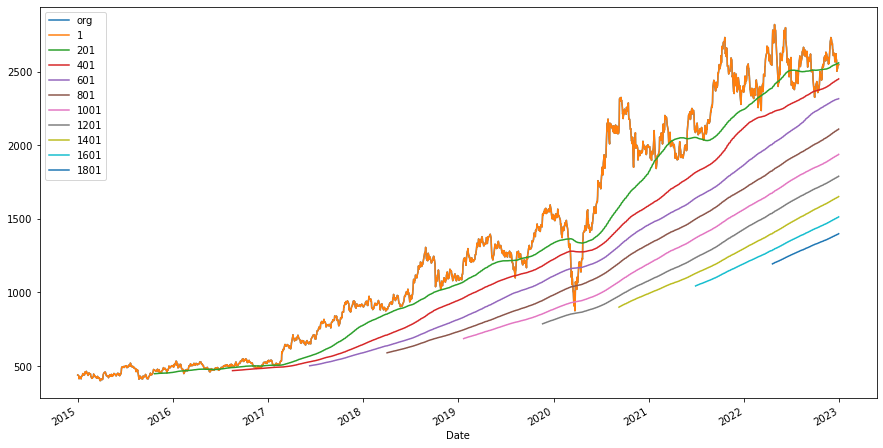

In [70]:
plt.figure(figsize=(15,8))
train_data.close.plot(label="org")
for i in range(1,1976,200):
    train_data["close"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best') 

In [71]:
##SMA
ma_day = [10,30,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    train_data[column_name]=pd.DataFrame.rolling(train_data['close'],ma).mean()

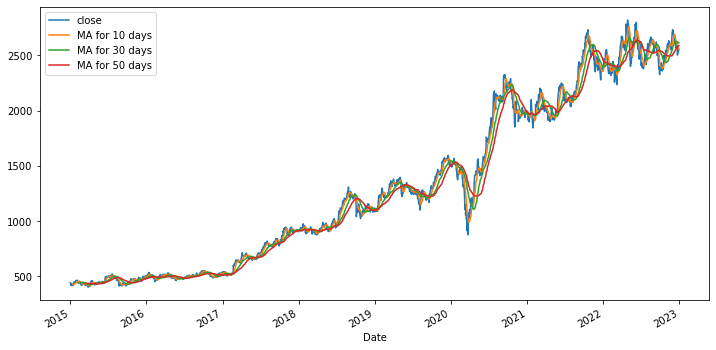

In [72]:
train_data[['close','MA for 10 days','MA for 30 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))
plt.show()

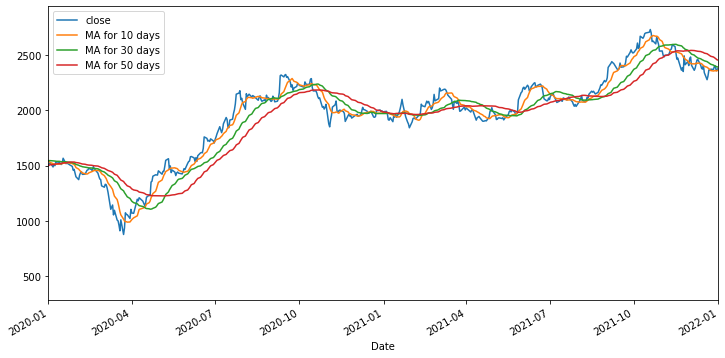

In [73]:
train_data[['close','MA for 10 days','MA for 30 days','MA for 50 days']].plot(xlim=['2020-01-01','2022-01-01'], subplots=False,figsize=(12,6))
plt.show()